In [5]:
import os
import numpy as np
import pickle
from PIL import Image
import matplotlib.pyplot as plt
from sklearn import tree
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import precision_recall_curve
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

# https://www.kaggle.com/datasets/vaibhao/handwritten-characters


2024-12-10 19:08:05.645499: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Load the dataset 10000 Samples of each Class for the Numbers Dataset

In [26]:
from concurrent.futures import ThreadPoolExecutor
import os
import numpy as np
from PIL import Image

data_path = "archive/Train"
#items = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','0','P','Q','R','R','S','T','U','V','W','X','Y','Z']
items = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
number_of_items = 10000 # define max number of loaded samples of each Class

sum_samples = 0

X = np.zeros((len(items) * number_of_items, 1024))
t = np.zeros((len(items) * number_of_items))
samples = []

def process_image(file_path, index, label):
    image = Image.open(file_path)
    return np.array(image).flatten(), index, label

with ThreadPoolExecutor() as executor:
    futures = []
    i = 0

    for j, item in enumerate(items):
        folder_path = os.path.join(data_path, item)
        file_count = len(os.listdir(folder_path))
        samples.append(file_count)
        sum_samples = sum_samples + file_count
        print(f'Loading Images "{item}" | Max number of Samples in Folder: {file_count} | processing...')
        for file in os.listdir(folder_path)[:number_of_items]:
            file_path = os.path.join(folder_path, file)
            futures.append(executor.submit(process_image, file_path, i, j))
            i += 1

    for future in futures:
        image_array, index, label = future.result()
        X[index, :] = image_array
        t[index] = label

print("\nSize of the matrix before cleaning:\n")
print(X.shape, t.shape)
print(f"Loaded Samples: {sum_samples}")

# Clean the Feature Matrix X and Target t
print("Size of the Matrix after cleaning empty Samples:") 
X = X[:sum_samples,:]
t = t[:sum_samples]


Loading Images "0" | Max number of Samples in Folder: 65504 | processing...
Loading Images "1" | Max number of Samples in Folder: 43773 | processing...
Loading Images "2" | Max number of Samples in Folder: 39351 | processing...
Loading Images "3" | Max number of Samples in Folder: 39996 | processing...
Loading Images "4" | Max number of Samples in Folder: 38112 | processing...
Loading Images "5" | Max number of Samples in Folder: 32317 | processing...
Loading Images "6" | Max number of Samples in Folder: 38879 | processing...
Loading Images "7" | Max number of Samples in Folder: 41080 | processing...
Loading Images "8" | Max number of Samples in Folder: 38795 | processing...
Loading Images "9" | Max number of Samples in Folder: 38319 | processing...

Size of the matrix before cleaning:

(100000, 1024) (100000,)
Loaded Samples: 416126
Size of the Matrix after cleaning empty Samples:


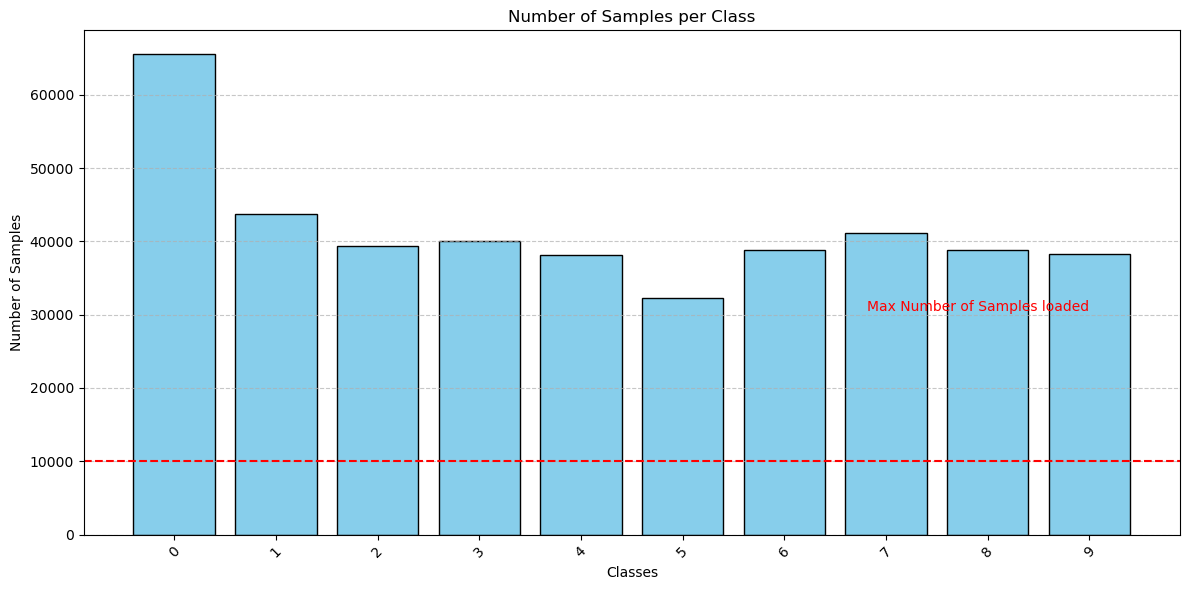

In [27]:
# Plot the number of samples
plt.figure(figsize=(12, 6))
plt.bar(items, samples, color='skyblue', edgecolor='black')
plt.axhline(y=number_of_items, color='red', linestyle='--', linewidth=1.5, label='Max Number of Samples loaded')
plt.text(x=len(items) - 1, y=30500, s="Max Number of Samples loaded", color='red', fontsize=10, ha='right')
plt.xlabel('Classes')
plt.ylabel('Number of Samples')
plt.title('Number of Samples per Class')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [28]:
# Save array
np.save('X_10000_numbers.npy', X)
np.save('t_10000_numbers.npy', t)

# Load the dataset 10000 Samples of each Class for the Alphabet

In [14]:
from concurrent.futures import ThreadPoolExecutor
import os
import numpy as np
from PIL import Image

data_path = "archive/Train"
items = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','0','P','Q','R','R','S','T','U','V','W','X','Y','Z']
#items = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
number_of_items = 10000 # define max number of loaded samples of each Class

sum_samples = 0

X = np.zeros((len(items) * number_of_items, 1024))
t = np.zeros((len(items) * number_of_items))
samples = []

def process_image(file_path, index, label):
    image = Image.open(file_path)
    return np.array(image).flatten(), index, label

with ThreadPoolExecutor() as executor:
    futures = []
    i = 0

    for j, item in enumerate(items):
        folder_path = os.path.join(data_path, item)
        file_count = len(os.listdir(folder_path))
        samples.append(file_count)
        sum_samples = sum_samples + file_count
        print(f'Loading Images "{item}" | Max number of Samples in Folder: {file_count} | processing...')
        for file in os.listdir(folder_path)[:number_of_items]:
            file_path = os.path.join(folder_path, file)
            futures.append(executor.submit(process_image, file_path, i, j))
            i += 1

    for future in futures:
        image_array, index, label = future.result()
        X[index, :] = image_array
        t[index] = label

print("\nSize of the matrix before cleaning:\n")
print(X.shape, t.shape)
print(f"Loaded Samples: {sum_samples}")

# Clean the Feature Matrix X and Target t
print("Size of the Matrix after cleaning empty Samples:") 
X = X[:sum_samples,:]
t = t[:sum_samples]


Loading Images "A" | Max number of Samples in Folder: 17205 | processing...
Loading Images "B" | Max number of Samples in Folder: 8666 | processing...
Loading Images "C" | Max number of Samples in Folder: 13560 | processing...
Loading Images "D" | Max number of Samples in Folder: 15509 | processing...
Loading Images "E" | Max number of Samples in Folder: 32627 | processing...
Loading Images "F" | Max number of Samples in Folder: 11636 | processing...
Loading Images "G" | Max number of Samples in Folder: 5443 | processing...
Loading Images "H" | Max number of Samples in Folder: 12134 | processing...
Loading Images "I" | Max number of Samples in Folder: 13873 | processing...
Loading Images "J" | Max number of Samples in Folder: 4261 | processing...
Loading Images "K" | Max number of Samples in Folder: 4334 | processing...
Loading Images "L" | Max number of Samples in Folder: 21648 | processing...
Loading Images "M" | Max number of Samples in Folder: 12089 | processing...
Loading Images "

# Plot the Number of Samples in each Class

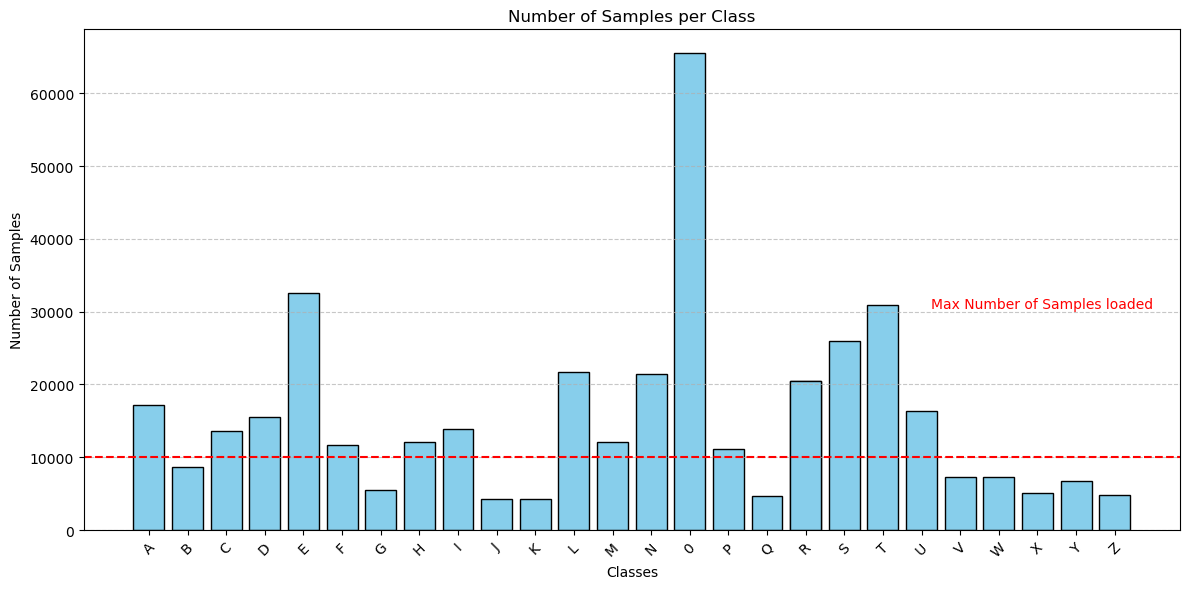

In [15]:
# Plot the number of samples
plt.figure(figsize=(12, 6))
plt.bar(items, samples, color='skyblue', edgecolor='black')
plt.axhline(y=number_of_items, color='red', linestyle='--', linewidth=1.5, label='Max Number of Samples loaded')
plt.text(x=len(items) - 1, y=30500, s="Max Number of Samples loaded", color='red', fontsize=10, ha='right')
plt.xlabel('Classes')
plt.ylabel('Number of Samples')
plt.title('Number of Samples per Class')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [16]:
# Save array
np.save('X_10000_alphabet.npy', X)
np.save('t_10000_alphabet.npy', t)

# Load the dataset 20000 Samples of each Class for the Alphabet

In [17]:
from concurrent.futures import ThreadPoolExecutor
import os
import numpy as np
from PIL import Image

data_path = "archive/Train"
items = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','0','P','Q','R','R','S','T','U','V','W','X','Y','Z']
#items = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
number_of_items = 20000 # define max number of loaded samples of each Class

sum_samples = 0

X = np.zeros((len(items) * number_of_items, 1024))
t = np.zeros((len(items) * number_of_items))
samples = []

def process_image(file_path, index, label):
    image = Image.open(file_path)
    return np.array(image).flatten(), index, label

with ThreadPoolExecutor() as executor:
    futures = []
    i = 0

    for j, item in enumerate(items):
        folder_path = os.path.join(data_path, item)
        file_count = len(os.listdir(folder_path))
        samples.append(file_count)
        sum_samples = sum_samples + file_count
        print(f'Loading Images "{item}" | Max number of Samples in Folder: {file_count} | processing...')
        for file in os.listdir(folder_path)[:number_of_items]:
            file_path = os.path.join(folder_path, file)
            futures.append(executor.submit(process_image, file_path, i, j))
            i += 1

    for future in futures:
        image_array, index, label = future.result()
        X[index, :] = image_array
        t[index] = label

print("\nSize of the matrix before cleaning:\n")
print(X.shape, t.shape)
print(f"Loaded Samples: {sum_samples}")

# Clean the Feature Matrix X and Target t
print("Size of the Matrix after cleaning empty Samples:") 
X = X[:sum_samples,:]
t = t[:sum_samples]


Loading Images "A" | Max number of Samples in Folder: 17205 | processing...
Loading Images "B" | Max number of Samples in Folder: 8666 | processing...
Loading Images "C" | Max number of Samples in Folder: 13560 | processing...
Loading Images "D" | Max number of Samples in Folder: 15509 | processing...
Loading Images "E" | Max number of Samples in Folder: 32627 | processing...
Loading Images "F" | Max number of Samples in Folder: 11636 | processing...
Loading Images "G" | Max number of Samples in Folder: 5443 | processing...
Loading Images "H" | Max number of Samples in Folder: 12134 | processing...
Loading Images "I" | Max number of Samples in Folder: 13873 | processing...
Loading Images "J" | Max number of Samples in Folder: 4261 | processing...
Loading Images "K" | Max number of Samples in Folder: 4334 | processing...
Loading Images "L" | Max number of Samples in Folder: 21648 | processing...
Loading Images "M" | Max number of Samples in Folder: 12089 | processing...
Loading Images "

# Plot the Number of Samples in each Class

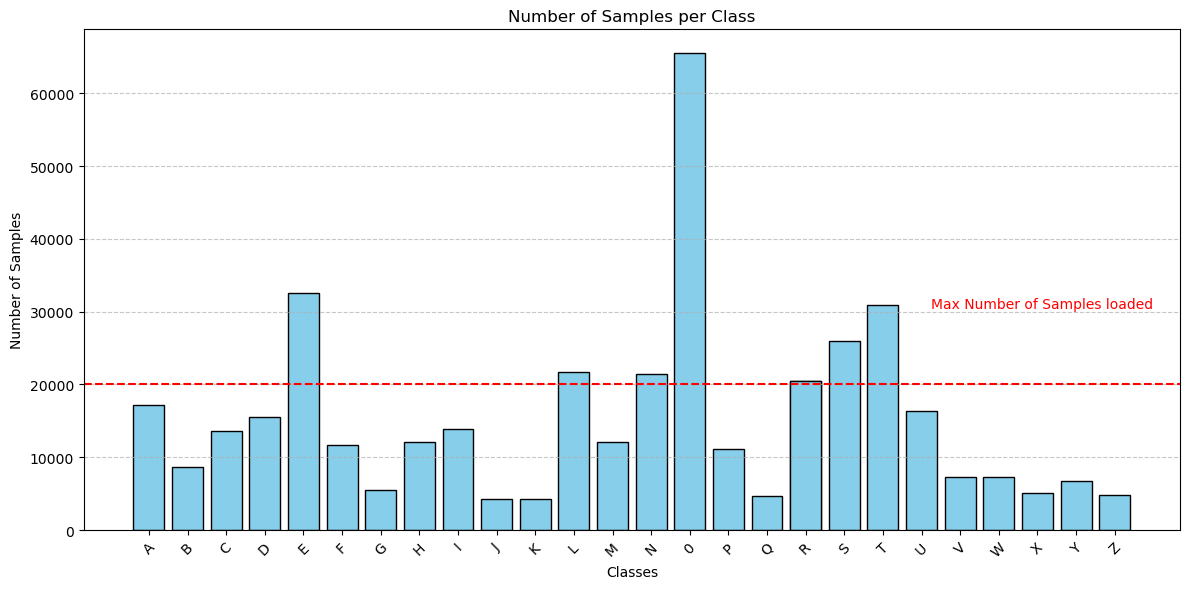

In [18]:
# Plot the number of samples
plt.figure(figsize=(12, 6))
plt.bar(items, samples, color='skyblue', edgecolor='black')
plt.axhline(y=number_of_items, color='red', linestyle='--', linewidth=1.5, label='Max Number of Samples loaded')
plt.text(x=len(items) - 1, y=30500, s="Max Number of Samples loaded", color='red', fontsize=10, ha='right')
plt.xlabel('Classes')
plt.ylabel('Number of Samples')
plt.title('Number of Samples per Class')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [19]:
# Save array
np.save('X_20000_alphabet.npy', X)
np.save('t_20000_alphabet.npy', t)

# Load the dataset 30000 Samples of each Class for the Alphabet

In [20]:
from concurrent.futures import ThreadPoolExecutor
import os
import numpy as np
from PIL import Image

data_path = "archive/Train"
items = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','0','P','Q','R','R','S','T','U','V','W','X','Y','Z']
#items = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
number_of_items = 30000 # define max number of loaded samples of each Class

sum_samples = 0

X = np.zeros((len(items) * number_of_items, 1024))
t = np.zeros((len(items) * number_of_items))
samples = []

def process_image(file_path, index, label):
    image = Image.open(file_path)
    return np.array(image).flatten(), index, label

with ThreadPoolExecutor() as executor:
    futures = []
    i = 0

    for j, item in enumerate(items):
        folder_path = os.path.join(data_path, item)
        file_count = len(os.listdir(folder_path))
        samples.append(file_count)
        sum_samples = sum_samples + file_count
        print(f'Loading Images "{item}" | Max number of Samples in Folder: {file_count} | processing...')
        for file in os.listdir(folder_path)[:number_of_items]:
            file_path = os.path.join(folder_path, file)
            futures.append(executor.submit(process_image, file_path, i, j))
            i += 1

    for future in futures:
        image_array, index, label = future.result()
        X[index, :] = image_array
        t[index] = label

print("\nSize of the matrix before cleaning:\n")
print(X.shape, t.shape)
print(f"Loaded Samples: {sum_samples}")

# Clean the Feature Matrix X and Target t
print("Size of the Matrix after cleaning empty Samples:") 
X = X[:sum_samples,:]
t = t[:sum_samples]


Loading Images "A" | Max number of Samples in Folder: 17205 | processing...
Loading Images "B" | Max number of Samples in Folder: 8666 | processing...
Loading Images "C" | Max number of Samples in Folder: 13560 | processing...
Loading Images "D" | Max number of Samples in Folder: 15509 | processing...
Loading Images "E" | Max number of Samples in Folder: 32627 | processing...
Loading Images "F" | Max number of Samples in Folder: 11636 | processing...
Loading Images "G" | Max number of Samples in Folder: 5443 | processing...
Loading Images "H" | Max number of Samples in Folder: 12134 | processing...
Loading Images "I" | Max number of Samples in Folder: 13873 | processing...
Loading Images "J" | Max number of Samples in Folder: 4261 | processing...
Loading Images "K" | Max number of Samples in Folder: 4334 | processing...
Loading Images "L" | Max number of Samples in Folder: 21648 | processing...
Loading Images "M" | Max number of Samples in Folder: 12089 | processing...
Loading Images "

# Plot the number of samples in each class

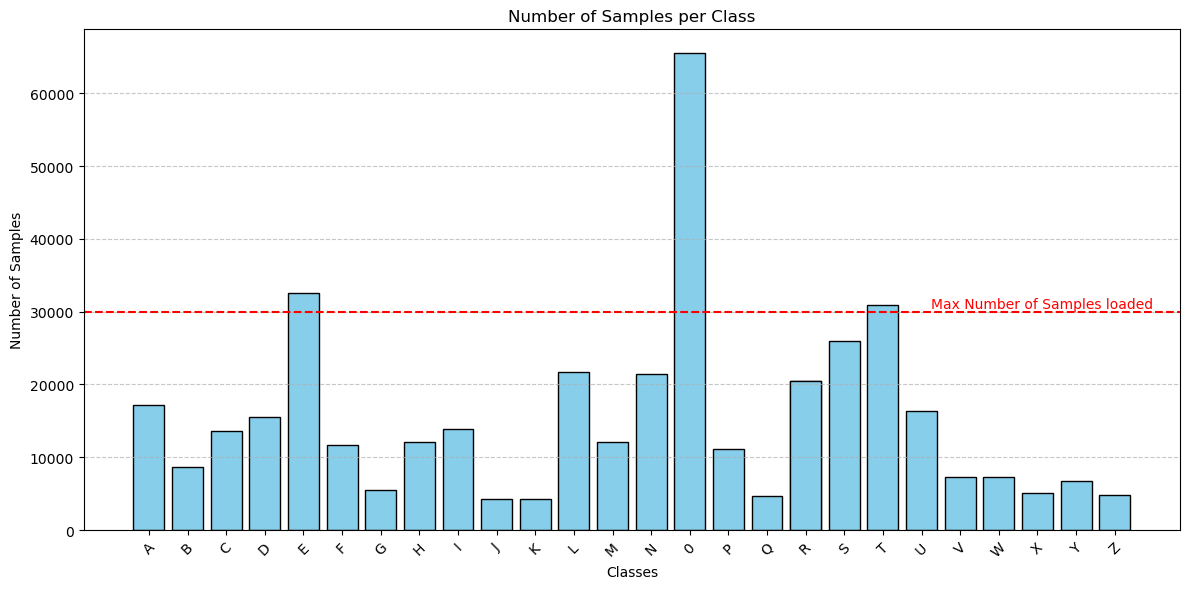

In [21]:
# Plot the number of samples
plt.figure(figsize=(12, 6))
plt.bar(items, samples, color='skyblue', edgecolor='black')
plt.axhline(y=number_of_items, color='red', linestyle='--', linewidth=1.5, label='Max Number of Samples loaded')
plt.text(x=len(items) - 1, y=30500, s="Max Number of Samples loaded", color='red', fontsize=10, ha='right')
plt.xlabel('Classes')
plt.ylabel('Number of Samples')
plt.title('Number of Samples per Class')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [25]:
# Save array
np.save('X_30000_alphabet.npy', X)
np.save('t_30000_alphabet.npy', t)

# Load the dataset 15000 Samples of each Class for the Alphabet + Numbers

In [1]:
from concurrent.futures import ThreadPoolExecutor
import os
import numpy as np
from PIL import Image

data_path = "archive/Train"
items = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','P','Q','R','S','T','U','V','W','X','Y','Z','0','1', '2', '3', '4', '5', '6', '7', '8', '9']
number_of_items = 10000 # define max number of loaded samples of each Class

sum_samples = 0

X = np.zeros((len(items) * number_of_items, 1024))
t = np.zeros((len(items) * number_of_items))
samples = []

def process_image(file_path, index, label):
    image = Image.open(file_path)
    return np.array(image).flatten(), index, label

with ThreadPoolExecutor() as executor:
    futures = []
    i = 0

    for j, item in enumerate(items):
        folder_path = os.path.join(data_path, item)
        file_count = len(os.listdir(folder_path))
        samples.append(file_count)
        sum_samples = sum_samples + file_count
        print(f'Loading Images "{item}" | Max number of Samples in Folder: {file_count} | processing...')
        for file in os.listdir(folder_path)[:number_of_items]:
            file_path = os.path.join(folder_path, file)
            futures.append(executor.submit(process_image, file_path, i, j))
            i += 1

    for future in futures:
        image_array, index, label = future.result()
        X[index, :] = image_array
        t[index] = label

print("\nSize of the matrix before cleaning:\n")
print(X.shape, t.shape)
print(f"Loaded Samples: {sum_samples}")

# Clean the Feature Matrix X and Target t
print("Size of the Matrix after cleaning empty Samples:") 
X = X[:sum_samples,:]
t = t[:sum_samples]


Loading Images "A" | Max number of Samples in Folder: 17205 | processing...
Loading Images "B" | Max number of Samples in Folder: 8666 | processing...
Loading Images "C" | Max number of Samples in Folder: 13560 | processing...
Loading Images "D" | Max number of Samples in Folder: 15509 | processing...
Loading Images "E" | Max number of Samples in Folder: 32627 | processing...
Loading Images "F" | Max number of Samples in Folder: 11636 | processing...
Loading Images "G" | Max number of Samples in Folder: 5443 | processing...
Loading Images "H" | Max number of Samples in Folder: 12134 | processing...
Loading Images "I" | Max number of Samples in Folder: 13873 | processing...
Loading Images "J" | Max number of Samples in Folder: 4261 | processing...
Loading Images "K" | Max number of Samples in Folder: 4334 | processing...
Loading Images "L" | Max number of Samples in Folder: 21648 | processing...
Loading Images "M" | Max number of Samples in Folder: 12089 | processing...
Loading Images "

In [3]:
# Save array
np.save('X_10000_mixed.npy', X)
np.save('t_10000_mixed.npy', t)

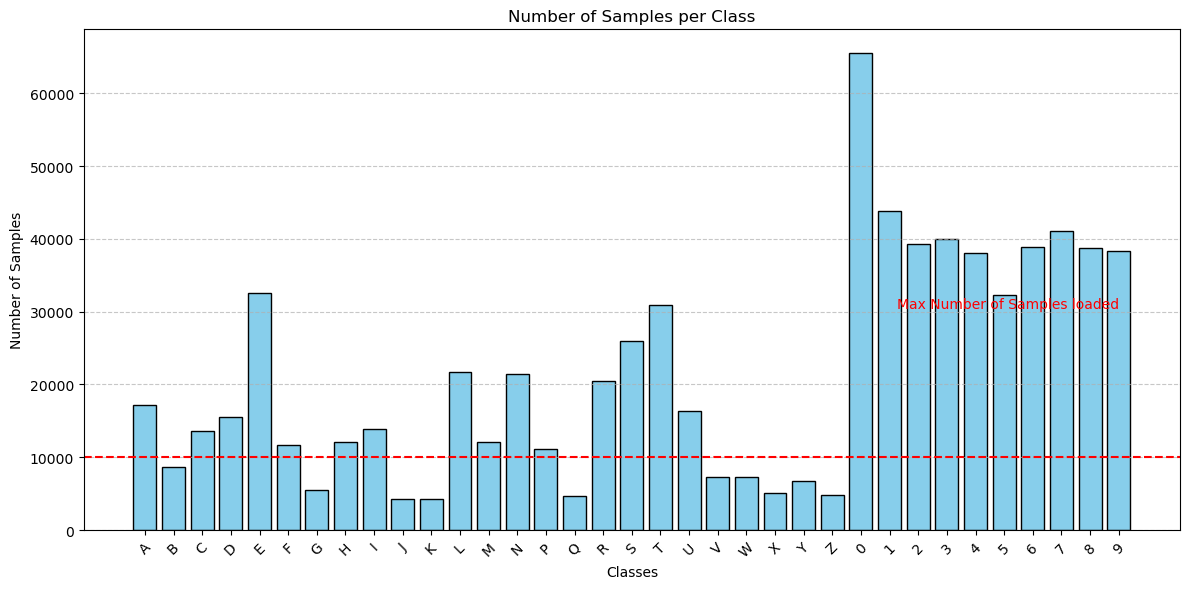

In [6]:
# Plot the number of samples
plt.figure(figsize=(12, 6))
plt.bar(items, samples, color='skyblue', edgecolor='black')
plt.axhline(y=number_of_items, color='red', linestyle='--', linewidth=1.5, label='Max Number of Samples loaded')
plt.text(x=len(items) - 1, y=30500, s="Max Number of Samples loaded", color='red', fontsize=10, ha='right')
plt.xlabel('Classes')
plt.ylabel('Number of Samples')
plt.title('Number of Samples per Class')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [8]:

def split_dataset_without_mixing(X, t, n):
    """
    Splits the dataset X and t into n parts while preserving the order.
    
    Parameters:
    - X: Feature dataset (numpy array).
    - t: Labels (numpy array).
    - n: Number of splits.
    
    Returns:
    - A tuple of lists: ([X1, X2, ...], [t1, t2, ...])
    """
    if len(X) != len(t):
        raise ValueError("X and t must have the same number of samples.")
    
    if len(X) % n != 0:
        raise ValueError("The dataset size must be divisible by n for equal splits.")
    
    split_size = len(X) // n
    X_splits = []
    t_splits = []
    
    for i in range(n):
        start = i * split_size
        end = start + split_size
        X_splits.append(X[start:end])
        t_splits.append(t[start:end])
    
    return X_splits, t_splits

# Beispiel: Splitte in 5 Teile
n_splits = 3
X_splits, t_splits = split_dataset_without_mixing(X, t, n_splits)

# Ausgabe der Ergebnisse
for i, (X_part, t_part) in enumerate(zip(X_splits, t_splits)):
    base_filename="dataset_split"
    print(f"Dataset {i+1}: X.shape = {X_part.shape}, t.shape = {t_part.shape}")
    filename = f"{base_filename}_{i+1}.pkl"
    with open(filename, "wb") as f:
        pickle.dump((X_part, t_part), f)
    print(f"Saved split {i+1} to {filename}")

Dataset 1: X.shape = (260000, 1024), t.shape = (260000,)
Saved split 1 to dataset_split_1.pkl
Dataset 2: X.shape = (260000, 1024), t.shape = (260000,)
Saved split 2 to dataset_split_2.pkl
Dataset 3: X.shape = (260000, 1024), t.shape = (260000,)
Saved split 3 to dataset_split_3.pkl


# Load Data from Numpy Array

In [30]:
# Load the Numbers Numpy Dataset
X_num = np.load('X_10000_numbers.npy')
t_num = np.load('t_10000_numbers.npy')

# Visualization of Samples 

### Numbers: 

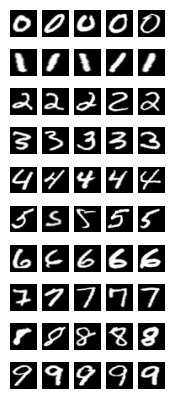

In [31]:
# displaying some examples of digits
plt.figure(figsize=(2,5))
grid_loc=1
for i in range(10):
    digits_labels_idx = np.where(t_num==i)[0]
    idx = np.random.randint(len(digits_labels_idx),size=5)
    for j in range(5):
        plt.subplot(10,5,grid_loc)
        plt.imshow(X_num[digits_labels_idx[idx[j]],:].reshape(32,32), cmap='gray')
        plt.axis('off')
        grid_loc+=1

### Alphabet

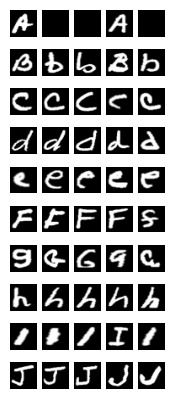

In [64]:
# displaying some examples of digits
plt.figure(figsize=(2,5))
grid_loc=1
for i in range(10):
    digits_labels_idx = np.where(t_alp==i)[0]
    idx = np.random.randint(len(digits_labels_idx),size=5)
    for j in range(5):
        plt.subplot(10,5,grid_loc)
        plt.imshow(X_alp[digits_labels_idx[idx[j]],:].reshape(32,32), cmap='gray')
        plt.axis('off')
        grid_loc+=1

# Classification for Numbers 

In [65]:
X_train, X_test, t_train, t_test  = train_test_split(X_num, t_num, 
                                                     test_size=0.2,
                                                     shuffle=True, 
                                                     random_state=42, 
                                                     stratify=t)

# Random Forest Classifier: 

In [9]:
pipeline = Pipeline(steps=[
    ('scaler', MinMaxScaler()),
    ('classifier', RandomForestClassifier(random_state=0))])

In [10]:
# Parameter Grid
param_grid = {
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__max_depth': [5,10,20,30,40],
    'classifier__min_samples_split': [2,4,6,8,10],
    'classifier__min_samples_leaf': [1,2,4]
}

# Optimized GridSearchCV
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=KFold(n_splits=5, shuffle=True, random_state=0),
    scoring='neg_mean_squared_error',
    refit=True,
    n_jobs=-2  # Parallel processing
)

grid_search.fit(X_train,t_train) # use X_train instead of X_train_prepeard, since the Classifier pipline includes the preprocessing pipline 
best_model = grid_search.best_estimator_
grid_search.best_params_

/opt/miniconda3/envs/c_env/lib/python3.9/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


{'classifier__criterion': 'entropy',
 'classifier__max_depth': 20,
 'classifier__min_samples_leaf': 2,
 'classifier__min_samples_split': 2}

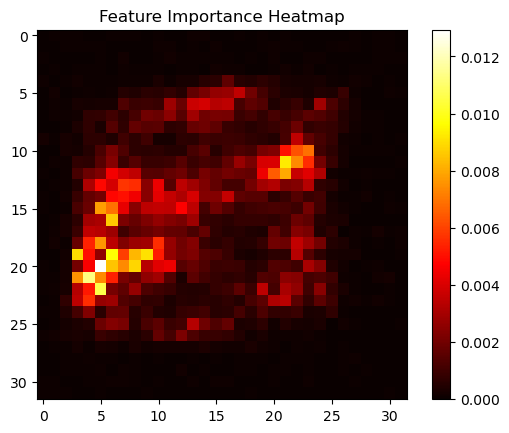

In [11]:
# Get feature importances from the best model
best_model = grid_search.best_estimator_.named_steps['classifier']
feature_importances = best_model.feature_importances_

# Reshape to 8x8 image
importances_image = feature_importances.reshape(32, 32)

# Display the image
plt.imshow(importances_image, cmap='hot', interpolation='nearest')
plt.title('Feature Importance Heatmap')
plt.colorbar()
plt.show()

In [17]:
y_train = best_model.predict(X_train)
y_test = best_model.predict(X_test)

In [19]:
# TRAINING SET PERFORMANCE
print('Training set performance:')
accuracy_train = metrics.accuracy_score(t_train, y_train)
print("Accuracy: %.3f" % accuracy_train)
precision_train = metrics.precision_score(t_train, y_train, average='weighted')  # Specify average
print("Precision: %.3f" % precision_train)
recall_train = metrics.recall_score(t_train, y_train, average='weighted')  # Specify average
print("Recall: %.3f" % recall_train)
f1_train = metrics.f1_score(t_train, y_train, average='weighted')  # Specify average
print("F1 Score: %.3f" % f1_train)
print(metrics.classification_report(t_train, y_train))

# TEST SET PERFORMANCE
print('Test set performance:')
accuracy_test = metrics.accuracy_score(t_test, y_test)
print("Accuracy: %.3f" % accuracy_test)
precision_test = metrics.precision_score(t_test, y_test, average='weighted')  # Specify average
print("Precision: %.3f" % precision_test)
recall_test = metrics.recall_score(t_test, y_test, average='weighted')  # Specify average
print("Recall: %.3f" % recall_test)
f1_test = metrics.f1_score(t_test, y_test, average='weighted')  # Specify average
print("F1 Score: %.3f" % f1_test)
print(metrics.classification_report(t_test, y_test))


Training set performance:
Accuracy: 0.599
Precision: 0.795
Recall: 0.599
F1 Score: 0.594
              precision    recall  f1-score   support

         0.0       0.50      1.00      0.67       160
         1.0       0.97      0.19      0.32       160
         2.0       0.87      0.74      0.80       160
         3.0       0.88      0.57      0.69       160
         4.0       0.95      0.62      0.75       160
         5.0       1.00      0.28      0.43       160
         6.0       0.87      0.74      0.80       160
         7.0       1.00      0.23      0.37       160
         8.0       0.29      0.91      0.44       160
         9.0       0.61      0.72      0.66       160

    accuracy                           0.60      1600
   macro avg       0.79      0.60      0.59      1600
weighted avg       0.79      0.60      0.59      1600

Test set performance:
Accuracy: 0.575
Precision: 0.770
Recall: 0.575
F1 Score: 0.569
              precision    recall  f1-score   support

         0.0

In [13]:
# Accuracy
train_accuracy = accuracy_score(t_train, y_train_predict)
test_accuracy = accuracy_score(t_test, y_test_predict)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Training Accuracy: 0.5994
Test Accuracy: 0.5750


In [36]:
# Report performance on the training set
print('Training set performance:')
print(classification_report(t_train, y_train_predict))

Training set performance:
              precision    recall  f1-score   support

         0.0       0.67      0.99      0.80       800
         1.0       1.00      0.05      0.09       800
         2.0       0.90      0.76      0.82       800
         3.0       0.83      0.47      0.60       800
         4.0       0.94      0.61      0.74       800
         5.0       0.99      0.22      0.36       800
         6.0       0.97      0.70      0.81       800
         7.0       1.00      0.20      0.34       800
         8.0       0.22      0.98      0.37       800
         9.0       0.54      0.50      0.52       800

    accuracy                           0.55      8000
   macro avg       0.81      0.55      0.54      8000
weighted avg       0.81      0.55      0.54      8000



In [27]:
# Report performance on the test set
print('Training set performance:')
print(classification_report(t_test, y_test_predict))

Training set performance:
              precision    recall  f1-score   support

         0.0       0.65      0.98      0.78       100
         1.0       1.00      0.05      0.10       100
         2.0       0.96      0.68      0.80       100
         3.0       0.82      0.50      0.62       100
         4.0       0.94      0.46      0.62       100
         5.0       1.00      0.31      0.47       100
         6.0       0.92      0.73      0.82       100
         7.0       0.96      0.26      0.41       100
         8.0       0.21      0.93      0.35       100
         9.0       0.54      0.48      0.51       100

    accuracy                           0.54      1000
   macro avg       0.80      0.54      0.55      1000
weighted avg       0.80      0.54      0.55      1000



In [ ]:
# Continue from here one HyperGator. Load Models and Run them...

# CNN for Numbers: 

In [25]:
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [26]:
# Load the Alphabet Dataset
X_num = np.load('X_10000_numbers.npy')
t_num = np.load('t_10000_numbers.npy')

In [27]:
# Normalize pixel values to [0, 1]
X_num = X_num / 255.0

# Reshape the data to include the channel dimension (32x32x1 for grayscale images)
X_num = X_num.reshape(-1, 32, 32, 1)

# Split the dataset into training and testing sets
X_train, X_test, t_train, t_test = train_test_split(X_num, t_num, 
                                                    test_size=0.2, 
                                                    random_state=42)

# Split the Training data into Train and Validation Set
X_train, X_val, t_train, t_val = train_test_split(X_train, 
                                                  t_train, 
                                                  shuffle=True,
                                                  stratify=t_train,
                                                  test_size=0.2)

print(f"Training Data Shape: {X_train.shape}, {t_train.shape}")
print(f"Validation Data Shape: {X_val.shape}, {t_val.shape}")

# Convert labels to one-hot encoding for training and validation
num_classes = 10
t_train_onehot = tf.keras.utils.to_categorical(t_train, num_classes=num_classes)
t_val_onehot = tf.keras.utils.to_categorical(t_val, num_classes=num_classes)
t_test_onehot = tf.keras.utils.to_categorical(t_test, num_classes=num_classes)

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')  # 10 classes for digits 0-9
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, t_train_onehot,
                    validation_data=(X_val, t_val_onehot),
                    epochs=10, 
                    batch_size=32)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, t_test_onehot, verbose=2)
print(f"Test accuracy: {test_acc:.2f}")

# Save the model for future use
model.save("digit_classifier.h5")

Training Data Shape: (64000, 32, 32, 1), (64000,)
Validation Data Shape: (16000, 32, 32, 1), (16000,)
Epoch 1/10
2000/2000 [==============================] - 4s 2ms/step - loss: 0.1795 - accuracy: 0.9460 - val_loss: 0.0389 - val_accuracy: 0.9881
Epoch 2/10
2000/2000 [==============================] - 3s 2ms/step - loss: 0.0642 - accuracy: 0.9817 - val_loss: 0.0289 - val_accuracy: 0.9905
Epoch 3/10
2000/2000 [==============================] - 3s 2ms/step - loss: 0.0462 - accuracy: 0.9870 - val_loss: 0.0269 - val_accuracy: 0.9916
Epoch 4/10
2000/2000 [==============================] - 3s 2ms/step - loss: 0.0374 - accuracy: 0.9888 - val_loss: 0.0311 - val_accuracy: 0.9908
Epoch 5/10
2000/2000 [==============================] - 3s 2ms/step - loss: 0.0305 - accuracy: 0.9908 - val_loss: 0.0282 - val_accuracy: 0.9927
Epoch 6/10
2000/2000 [==============================] - 3s 2ms/step - loss: 0.0274 - accuracy: 0.9918 - val_loss: 0.0235 - val_accuracy: 0.9934
Epoch 7/10
2000/2000 [============

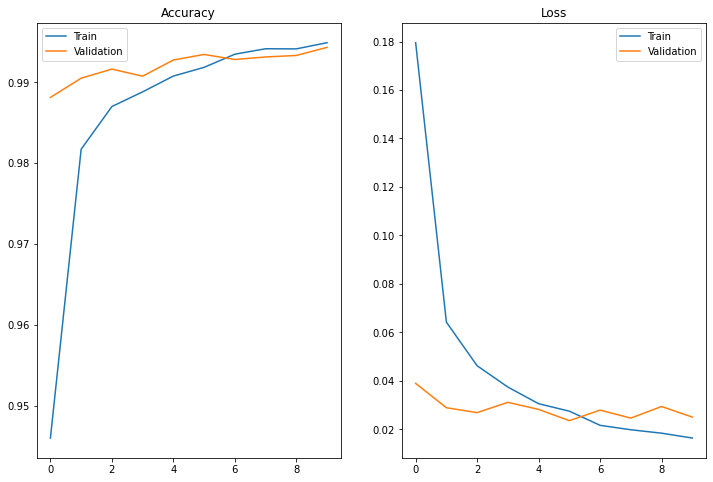

Training Set Performance
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      6396
         1.0       1.00      1.00      1.00      6390
         2.0       1.00      1.00      1.00      6418
         3.0       1.00      1.00      1.00      6370
         4.0       1.00      1.00      1.00      6399
         5.0       1.00      1.00      1.00      6400
         6.0       1.00      1.00      1.00      6412
         7.0       1.00      1.00      1.00      6398
         8.0       1.00      1.00      1.00      6406
         9.0       1.00      1.00      1.00      6411

    accuracy                           1.00     64000
   macro avg       1.00      1.00      1.00     64000
weighted avg       1.00      1.00      1.00     64000



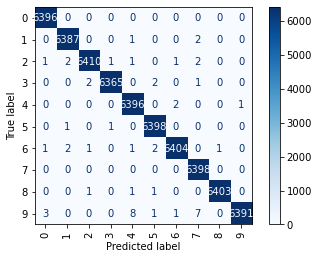

Validation Set Performance
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      1599
         1.0       1.00      1.00      1.00      1597
         2.0       1.00      0.99      0.99      1605
         3.0       1.00      0.99      0.99      1592
         4.0       0.99      0.99      0.99      1599
         5.0       0.99      1.00      0.99      1600
         6.0       1.00      0.99      0.99      1603
         7.0       0.99      1.00      0.99      1600
         8.0       0.99      1.00      0.99      1602
         9.0       1.00      0.99      0.99      1603

    accuracy                           0.99     16000
   macro avg       0.99      0.99      0.99     16000
weighted avg       0.99      0.99      0.99     16000



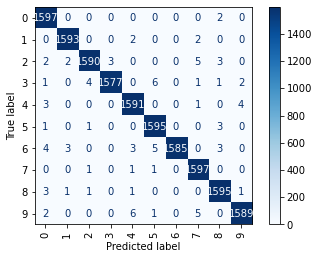

In [28]:
# Plot learning curves
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Loss')
plt.legend()
plt.show()

# Classification Report and Confusion Matrix for Training Set
print('Training Set Performance')
y_train_pred = np.argmax(model.predict(X_train), axis=1)
print(classification_report(t_train, y_train_pred))

cm = confusion_matrix(t_train, y_train_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[str(i) for i in range(num_classes)])
disp.plot(xticks_rotation='vertical', cmap='Blues')
plt.show()

# Classification Report and Confusion Matrix for Validation Set
print('Validation Set Performance')
y_val_pred = np.argmax(model.predict(X_val), axis=1)
print(classification_report(t_val, y_val_pred))

cm = confusion_matrix(t_val, y_val_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[str(i) for i in range(num_classes)])
disp.plot(xticks_rotation='vertical', cmap='Blues')
plt.show()

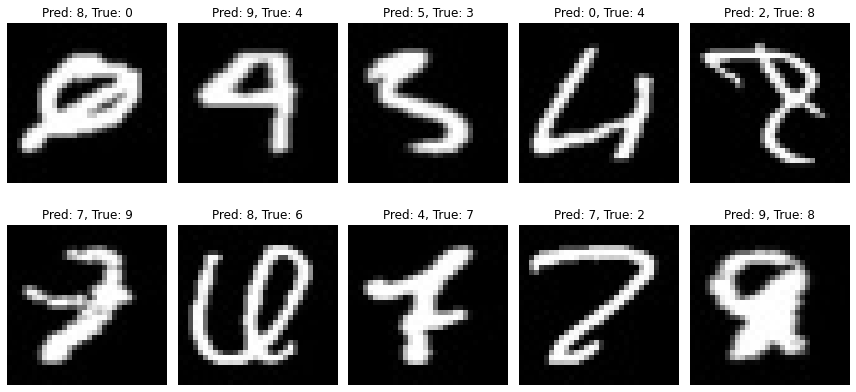

In [29]:
# Predict the entire test set
predictions = model.predict(X_test)
predicted_labels = tf.argmax(predictions, axis=1).numpy()

# True labels are already in integer form
true_labels = t_test 

# Find indices of misclassified samples
misclassified_indices = np.where(predicted_labels != true_labels)[0]

# If there are misclassified samples, display them
if len(misclassified_indices) > 0:
    
    sample_indices = np.random.choice(misclassified_indices, min(10, len(misclassified_indices)), replace=False)

    # Plot the misclassified samples
    plt.figure(figsize=(12, 6))
    for i, idx in enumerate(sample_indices):
        image = X_test[idx].squeeze()  
        pred_label = predicted_labels[idx]
        true_label = true_labels[idx]

        plt.subplot(2, 5, i + 1)
        plt.imshow(image, cmap='gray')
        plt.title(f"Pred: {class_names[pred_label]}, True: {class_names[int(true_label)]}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()



# CNN for the Alphabet

In [2]:
class_names = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','0','P','Q','R','R','S','T','U','V','W','X','Y','Z']

## Model 1: For the Dataset with 10000 Letters of each Class

In [35]:
# Load the Alphabet Dataset
X_alp = np.load('X_10000_alphabet.npy')
t_alp = np.load('t_10000_alphabet.npy')

In [36]:
# Normalize the data
X_alp = X_alp / 255.0

# Reshape the data to include the channel dimension (32x32x1 for grayscale images)
X_alp = X_alp.reshape(-1, 32, 32, 1)

# Split the dataset into training and testing sets
X_train, X_test, t_train, t_test = train_test_split(X_alp, t_alp, 
                                                    test_size=0.2, 
                                                    random_state=42)

# Split the Training data into Train and Validation Set
X_train, X_val, t_train, t_val = train_test_split(X_train, 
                                                  t_train, 
                                                  shuffle=True,
                                                  stratify=t_train,
                                                  test_size=0.2)

# Convert labels to one-hot encoding (35 classes: 0-9, A-Z including 'O' as 0)
num_classes = 27
t_train_onehot = tf.keras.utils.to_categorical(t_train, num_classes=num_classes)
t_val_onehot = tf.keras.utils.to_categorical(t_val, num_classes=num_classes)
t_test_onehot = tf.keras.utils.to_categorical(t_test, num_classes=num_classes)

# Define the CNN model with adjusted architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')  # 10 classes for digits 0-9
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, t_train_onehot,
                    validation_data=(X_val, t_val_onehot),
                    epochs=10, 
                    batch_size=32)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, t_test_onehot, verbose=2)
print(f"Test accuracy: {test_acc:.2f}")

# Save the model for future use
model.save("alpha_classifier_10000.h5")


Epoch 1/10
5400/5400 [==============================] - 10s 2ms/step - loss: 0.5830 - accuracy: 0.8068 - val_loss: 0.2592 - val_accuracy: 0.8975
Epoch 2/10
5400/5400 [==============================] - 9s 2ms/step - loss: 0.3436 - accuracy: 0.8765 - val_loss: 0.2188 - val_accuracy: 0.9102
Epoch 3/10
5400/5400 [==============================] - 9s 2ms/step - loss: 0.2944 - accuracy: 0.8895 - val_loss: 0.2113 - val_accuracy: 0.9125
Epoch 4/10
5400/5400 [==============================] - 9s 2ms/step - loss: 0.2693 - accuracy: 0.8962 - val_loss: 0.2060 - val_accuracy: 0.9124
Epoch 5/10
5400/5400 [==============================] - 9s 2ms/step - loss: 0.2497 - accuracy: 0.9013 - val_loss: 0.1993 - val_accuracy: 0.9159
Epoch 6/10
5400/5400 [==============================] - 10s 2ms/step - loss: 0.2369 - accuracy: 0.9047 - val_loss: 0.1955 - val_accuracy: 0.9160
Epoch 7/10
5400/5400 [==============================] - 9s 2ms/step - loss: 0.2276 - accuracy: 0.9070 - val_loss: 0.1949 - val_accurac

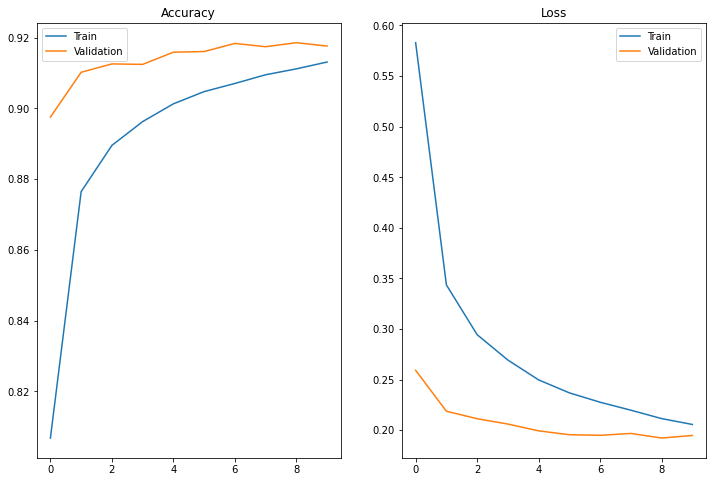

Training Set Performance
              precision    recall  f1-score   support

           A       0.99      1.00      1.00     32776
           B       0.99      0.99      0.99      5538
           C       0.99      0.98      0.99      6416
           D       0.98      0.99      0.98      6378
           E       0.98      0.99      0.98      6402
           F       0.99      0.99      0.99      6396
           G       0.93      0.88      0.90      3495
           H       0.99      0.97      0.98      6363
           I       0.77      0.78      0.78      6398
           J       0.98      0.97      0.97      2790
           K       0.98      0.99      0.99      2789
           L       0.77      0.77      0.77      6386
           M       1.00      0.99      0.99      6394
           N       0.96      0.99      0.97      6391
           0       0.99      0.98      0.98      6377
           P       0.99      0.99      0.99      6404
           Q       0.90      0.92      0.91      3014
  

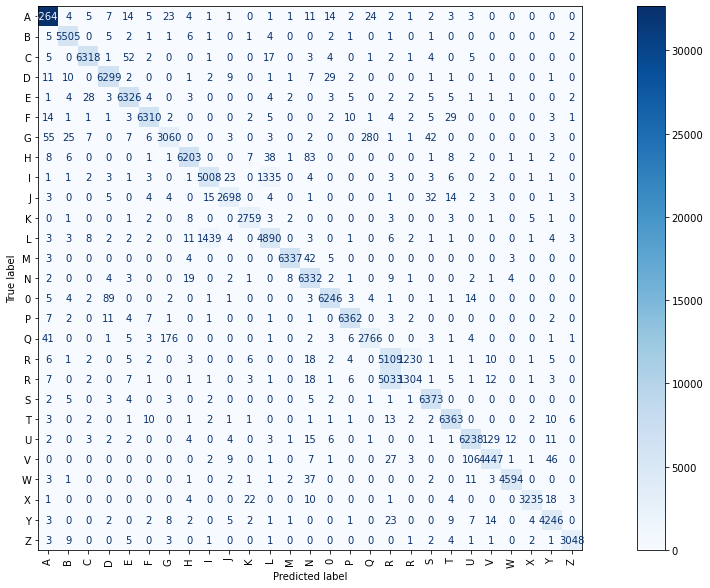

Validation Set Performance
              precision    recall  f1-score   support

           A       0.99      0.99      0.99      8194
           B       0.97      0.98      0.98      1384
           C       0.98      0.97      0.98      1604
           D       0.95      0.97      0.96      1595
           E       0.97      0.97      0.97      1601
           F       0.98      0.97      0.97      1599
           G       0.88      0.82      0.85       874
           H       0.97      0.95      0.96      1591
           I       0.76      0.78      0.77      1599
           J       0.96      0.96      0.96       697
           K       0.96      0.98      0.97       697
           L       0.76      0.75      0.76      1597
           M       0.99      0.98      0.99      1599
           N       0.94      0.99      0.96      1598
           0       0.98      0.96      0.97      1594
           P       0.98      0.99      0.98      1601
           Q       0.85      0.85      0.85       753


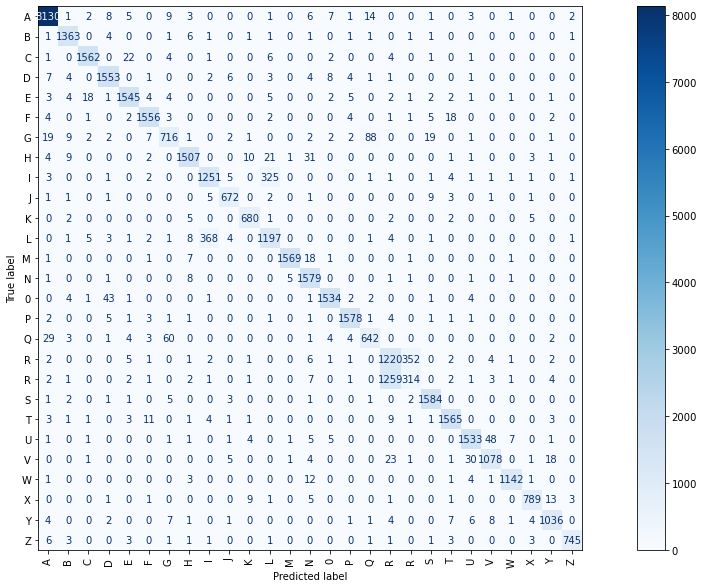

In [37]:
# Plot learning curves
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Loss')
plt.legend()
plt.show()

class_names = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','0','P','Q','R','R','S','T','U','V','W','X','Y','Z']

# Classification Report and Confusion Matrix for Training Set
print('Training Set Performance')
y_train_pred = np.argmax(model.predict(X_train), axis=1)
print(classification_report(t_train, y_train_pred, target_names=class_names))

cm = confusion_matrix(t_train, y_train_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
fig, ax = plt.subplots(figsize=(20, 10))  # Explicitly create a figure and axis
disp.plot(xticks_rotation='vertical', cmap='Blues', ax=ax)
plt.show()

# Classification Report and Confusion Matrix for Validation Set
print('Validation Set Performance')
y_val_pred = np.argmax(model.predict(X_val), axis=1)
print(classification_report(t_val, y_val_pred, target_names=class_names))

cm = confusion_matrix(t_val, y_val_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
fig, ax = plt.subplots(figsize=(20, 10))  # Explicitly create a figure and axis
disp.plot(xticks_rotation='vertical', cmap='Blues', ax=ax)
plt.show()

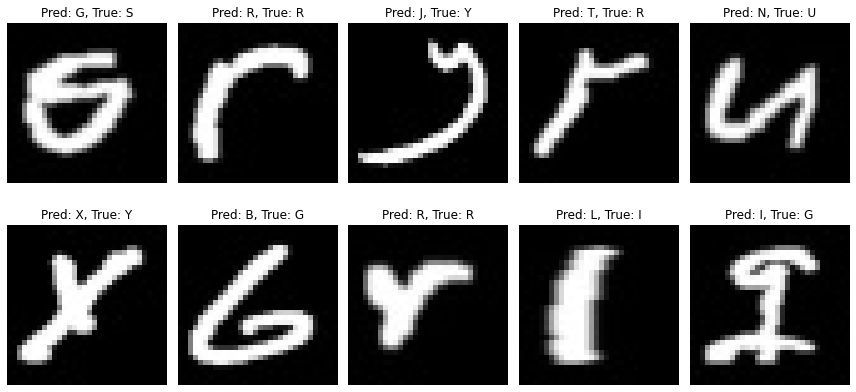

In [38]:
# Predict the entire test set
predictions = model.predict(X_test)
predicted_labels = tf.argmax(predictions, axis=1).numpy()

# True labels are already in integer form
true_labels = t_test 

# Find indices of misclassified samples
misclassified_indices = np.where(predicted_labels != true_labels)[0]

# If there are misclassified samples, display them
if len(misclassified_indices) > 0:
    
    sample_indices = np.random.choice(misclassified_indices, min(10, len(misclassified_indices)), replace=False)

    # Plot the misclassified samples
    plt.figure(figsize=(12, 6))
    for i, idx in enumerate(sample_indices):
        image = X_test[idx].squeeze()  
        pred_label = predicted_labels[idx]
        true_label = true_labels[idx]

        plt.subplot(2, 5, i + 1)
        plt.imshow(image, cmap='gray')
        plt.title(f"Pred: {class_names[pred_label]}, True: {class_names[int(true_label)]}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()



# Model 2: For the Dataset with 10000 Letters of each Class

In [31]:
# Normalize the data
X_alp = X_alp / 255.0

# Reshape the data to include the channel dimension (32x32x1 for grayscale images)
X_alp = X_alp.reshape(-1, 32, 32, 1)

# Split the dataset into training and testing sets
X_train, X_test, t_train, t_test = train_test_split(X_alp, t_alp, 
                                                    test_size=0.2, 
                                                    random_state=42)

# Split the Training data into Train and Validation Set
X_train, X_val, t_train, t_val = train_test_split(X_train, 
                                                  t_train, 
                                                  shuffle=True,
                                                  stratify=t_train,
                                                  test_size=0.2)

# Convert labels to one-hot encoding (35 classes: 0-9, A-Z including 'O' as 0)
num_classes = 27
t_train_onehot = tf.keras.utils.to_categorical(t_train, num_classes=num_classes)
t_val_onehot = tf.keras.utils.to_categorical(t_val, num_classes=num_classes)
t_test_onehot = tf.keras.utils.to_categorical(t_test, num_classes=num_classes)

# Define the CNN model with adjusted architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),  # Additional dense layer
    Dense(num_classes, activation='softmax')  # 36 classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, t_train_onehot,
                    validation_data=(X_val, t_val_onehot),
                    epochs=10, 
                    batch_size=32)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, t_test_onehot, verbose=2)
print(f"Test accuracy: {test_acc:.2f}")

# Save the model for future use
model.save("alpha_classifier_10000.h5")


Epoch 1/10
5400/5400 [==============================] - 11s 2ms/step - loss: 0.4518 - accuracy: 0.8444 - val_loss: 0.2270 - val_accuracy: 0.9095
Epoch 2/10
5400/5400 [==============================] - 10s 2ms/step - loss: 0.2554 - accuracy: 0.8998 - val_loss: 0.2120 - val_accuracy: 0.9121
Epoch 3/10
5400/5400 [==============================] - 10s 2ms/step - loss: 0.2259 - accuracy: 0.9084 - val_loss: 0.2005 - val_accuracy: 0.9151
Epoch 4/10
5400/5400 [==============================] - 10s 2ms/step - loss: 0.2081 - accuracy: 0.9123 - val_loss: 0.1909 - val_accuracy: 0.9181
Epoch 5/10
5400/5400 [==============================] - 10s 2ms/step - loss: 0.1983 - accuracy: 0.9146 - val_loss: 0.1895 - val_accuracy: 0.9190
Epoch 6/10
5400/5400 [==============================] - 10s 2ms/step - loss: 0.1882 - accuracy: 0.9179 - val_loss: 0.1901 - val_accuracy: 0.9186
Epoch 7/10
5400/5400 [==============================] - 10s 2ms/step - loss: 0.1822 - accuracy: 0.9191 - val_loss: 0.1876 - val_ac

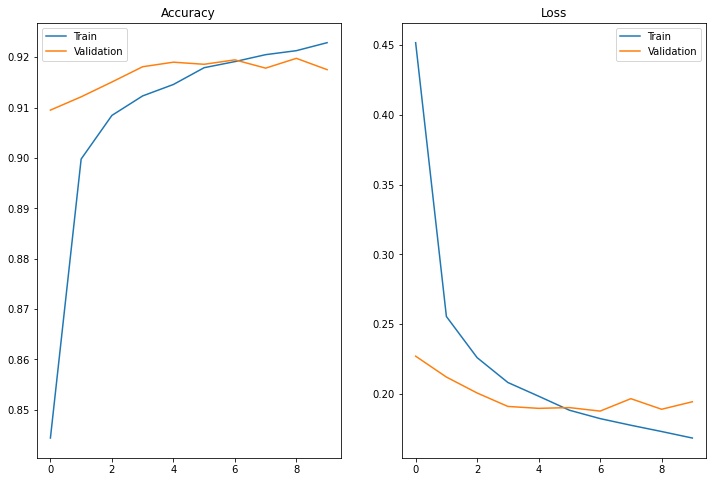

Training Set Performance
              precision    recall  f1-score   support

           A       0.99      1.00      1.00     32776
           B       0.99      0.99      0.99      5538
           C       0.99      0.99      0.99      6416
           D       0.98      0.99      0.98      6378
           E       0.98      0.99      0.99      6402
           F       0.99      0.98      0.99      6396
           G       0.95      0.85      0.89      3495
           H       0.98      0.99      0.98      6363
           I       0.76      0.80      0.78      6398
           J       0.99      0.97      0.98      2790
           K       0.99      0.99      0.99      2789
           L       0.79      0.73      0.76      6387
           M       1.00      0.99      1.00      6394
           N       0.97      0.99      0.98      6391
           0       0.99      0.98      0.99      6377
           P       0.99      0.99      0.99      6404
           Q       0.87      0.94      0.90      3014
  

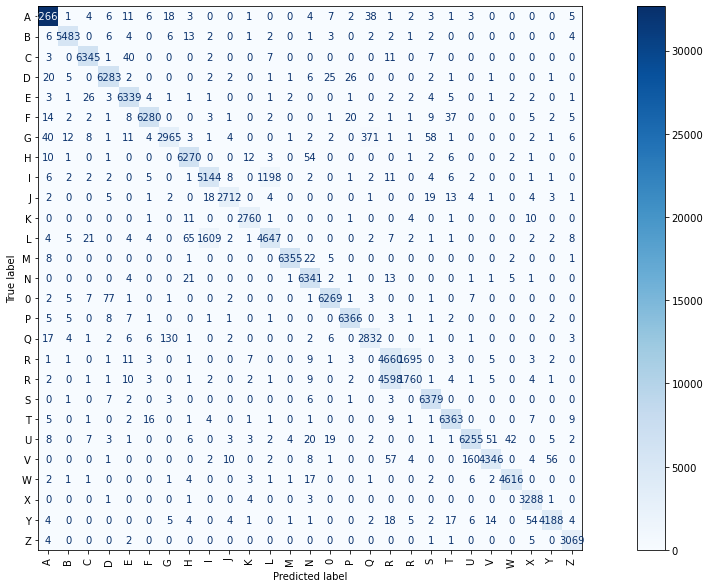

Validation Set Performance
              precision    recall  f1-score   support

           A       0.99      0.99      0.99      8194
           B       0.98      0.98      0.98      1384
           C       0.97      0.97      0.97      1604
           D       0.96      0.97      0.97      1595
           E       0.96      0.98      0.97      1601
           F       0.99      0.96      0.97      1599
           G       0.92      0.81      0.86       874
           H       0.97      0.97      0.97      1591
           I       0.74      0.76      0.75      1599
           J       0.96      0.94      0.95       697
           K       0.97      0.98      0.98       697
           L       0.76      0.72      0.74      1596
           M       0.99      0.99      0.99      1599
           N       0.96      0.98      0.97      1598
           0       0.96      0.96      0.96      1594
           P       0.99      0.99      0.99      1601
           Q       0.84      0.89      0.86       753


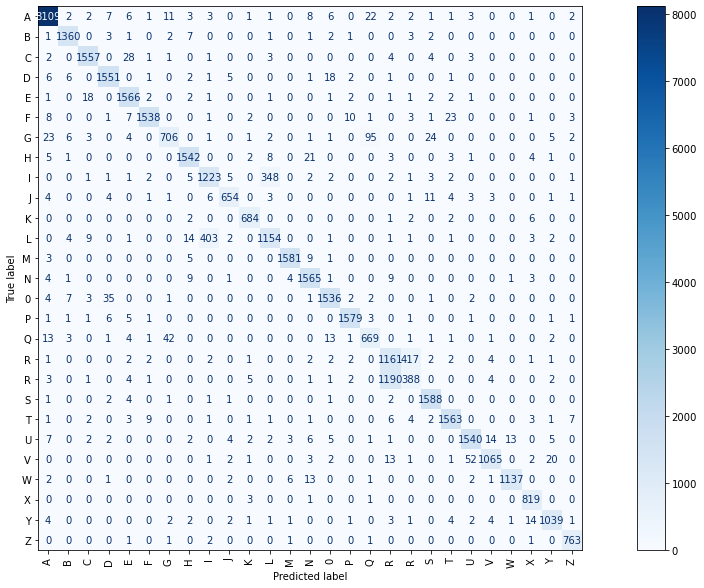

In [32]:
# Plot learning curves
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Loss')
plt.legend()
plt.show()

class_names = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','0','P','Q','R','R','S','T','U','V','W','X','Y','Z']

# Classification Report and Confusion Matrix for Training Set
print('Training Set Performance')
y_train_pred = np.argmax(model.predict(X_train), axis=1)
print(classification_report(t_train, y_train_pred, target_names=class_names))

cm = confusion_matrix(t_train, y_train_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
fig, ax = plt.subplots(figsize=(20, 10))  # Explicitly create a figure and axis
disp.plot(xticks_rotation='vertical', cmap='Blues', ax=ax)
plt.show()

# Classification Report and Confusion Matrix for Validation Set
print('Validation Set Performance')
y_val_pred = np.argmax(model.predict(X_val), axis=1)
print(classification_report(t_val, y_val_pred, target_names=class_names))

cm = confusion_matrix(t_val, y_val_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
fig, ax = plt.subplots(figsize=(20, 10))  # Explicitly create a figure and axis
disp.plot(xticks_rotation='vertical', cmap='Blues', ax=ax)
plt.show()

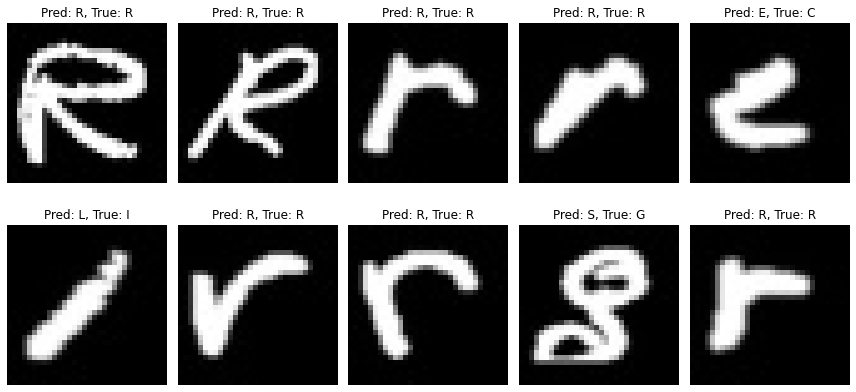

In [33]:
# Predict the entire test set
predictions = model.predict(X_test)
predicted_labels = tf.argmax(predictions, axis=1).numpy()

# True labels are already in integer form
true_labels = t_test 

# Find indices of misclassified samples
misclassified_indices = np.where(predicted_labels != true_labels)[0]

# If there are misclassified samples, display them
if len(misclassified_indices) > 0:
    
    sample_indices = np.random.choice(misclassified_indices, min(10, len(misclassified_indices)), replace=False)

    # Plot the misclassified samples
    plt.figure(figsize=(12, 6))
    for i, idx in enumerate(sample_indices):
        image = X_test[idx].squeeze()  
        pred_label = predicted_labels[idx]
        true_label = true_labels[idx]

        plt.subplot(2, 5, i + 1)
        plt.imshow(image, cmap='gray')
        plt.title(f"Pred: {class_names[pred_label]}, True: {class_names[int(true_label)]}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()



## Model 2: For the Dataset with 20000 Letters of each Class:

In [4]:
# Load the Alphabet Dataset
X_alp = np.load('X_20000_alphabet.npy')
t_alp = np.load('t_20000_alphabet.npy')

In [ ]:
# Normalize the data
X_alp = X_alp / 255.0

# Reshape the data to include the channel dimension (32x32x1 for grayscale images)
X_alp = X_alp.reshape(-1, 32, 32, 1)

# Split the dataset into training and testing sets
X_train, X_test, t_train, t_test = train_test_split(X_alp, t_alp, 
                                                    test_size=0.2, 
                                                    random_state=42)

# Split the Training data into Train and Validation Set
X_train, X_val, t_train, t_val = train_test_split(X_train, 
                                                  t_train, 
                                                  shuffle=True,
                                                  stratify=t_train,
                                                  test_size=0.2)

# Convert labels to one-hot encoding (35 classes: 0-9, A-Z including 'O' as 0)
num_classes = 27
t_train_onehot = tf.keras.utils.to_categorical(t_train, num_classes=num_classes)
t_val_onehot = tf.keras.utils.to_categorical(t_val, num_classes=num_classes)
t_test_onehot = tf.keras.utils.to_categorical(t_test, num_classes=num_classes)

# Define the CNN model with adjusted architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),  # Additional dense layer
    Dense(num_classes, activation='softmax')  # 36 classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, t_train_onehot,
                    validation_data=(X_val, t_val_onehot),
                    epochs=10, 
                    batch_size=32)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, t_test_onehot, verbose=2)
print(f"Test accuracy: {test_acc:.2f}")

# Save the model for future use
model.save("alpha_classifier_20000.h5")


In [ ]:
# Plot learning curves
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Loss')
plt.legend()
plt.show()

class_names = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','0','P','Q','R','R','S','T','U','V','W','X','Y','Z']

# Classification Report and Confusion Matrix for Training Set
print('Training Set Performance')
y_train_pred = np.argmax(model.predict(X_train), axis=1)
print(classification_report(t_train, y_train_pred, target_names=class_names))

cm = confusion_matrix(t_train, y_train_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
fig, ax = plt.subplots(figsize=(20, 10))  # Explicitly create a figure and axis
disp.plot(xticks_rotation='vertical', cmap='Blues', ax=ax)
plt.show()

# Classification Report and Confusion Matrix for Validation Set
print('Validation Set Performance')
y_val_pred = np.argmax(model.predict(X_val), axis=1)
print(classification_report(t_val, y_val_pred, target_names=class_names))

cm = confusion_matrix(t_val, y_val_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
fig, ax = plt.subplots(figsize=(20, 10))  # Explicitly create a figure and axis
disp.plot(xticks_rotation='vertical', cmap='Blues', ax=ax)
plt.show()


In [ ]:
# Predict the entire test set
predictions = model.predict(X_test)
predicted_labels = tf.argmax(predictions, axis=1).numpy()

# True labels are already in integer form
true_labels = t_test 

# Find indices of misclassified samples
misclassified_indices = np.where(predicted_labels != true_labels)[0]

# If there are misclassified samples, display them
if len(misclassified_indices) > 0:
    
    sample_indices = np.random.choice(misclassified_indices, min(10, len(misclassified_indices)), replace=False)

    # Plot the misclassified samples
    plt.figure(figsize=(12, 6))
    for i, idx in enumerate(sample_indices):
        image = X_test[idx].squeeze()  
        pred_label = predicted_labels[idx]
        true_label = true_labels[idx]

        plt.subplot(2, 5, i + 1)
        plt.imshow(image, cmap='gray')
        plt.title(f"Pred: {class_names[pred_label]}, True: {class_names[int(true_label)]}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()



## Model 2: For the Dataset with 30000 Letters of each Class

In [2]:
# Load the Alphabet Dataset
X_alp = np.load('X_30000_alphabet.npy')
t_alp = np.load('t_30000_alphabet.npy')

In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam


# Normalize the data
X_alp = X_alp / 255.0

# Reshape the data to include the channel dimension (32x32x1 for grayscale images)
X_alp = X_alp.reshape(-1, 32, 32, 1)

# Split the dataset into training and testing sets
X_train, X_test, t_train, t_test = train_test_split(X_alp, t_alp, 
                                                    test_size=0.2, 
                                                    random_state=42)

# Split the Training data into Train and Validation Set
X_train, X_val, t_train, t_val = train_test_split(X_train, 
                                                  t_train, 
                                                  shuffle=True,
                                                  stratify=t_train,
                                                  test_size=0.2)

# Convert labels to one-hot encoding (35 classes: 0-9, A-Z including 'O' as 0)
num_classes = 27
t_train_onehot = tf.keras.utils.to_categorical(t_train, num_classes=num_classes)
t_val_onehot = tf.keras.utils.to_categorical(t_val, num_classes=num_classes)
t_test_onehot = tf.keras.utils.to_categorical(t_test, num_classes=num_classes)

# Define the CNN model with adjusted architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),  # Additional dense layer
    Dense(num_classes, activation='softmax')  # 36 classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, t_train_onehot,
                    validation_data=(X_val, t_val_onehot),
                    epochs=10, 
                    batch_size=32)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, t_test_onehot, verbose=2)
print(f"Test accuracy: {test_acc:.2f}")

# Save the model for future use
model.save("alpha_classifier_30000.h5")


2024-12-10 01:16:48.831591: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-12-10 01:16:49.735714: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 78902 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-80GB, pci bus id: 0000:47:00.0, compute capability: 8.0


Epoch 1/10


2024-12-10 01:16:52.334398: I tensorflow/stream_executor/cuda/cuda_dnn.cc:366] Loaded cuDNN version 8201
2024-12-10 01:16:54.018057: I tensorflow/stream_executor/cuda/cuda_blas.cc:1774] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


8423/8423 [==============================] - 22s 2ms/step - loss: 0.3893 - accuracy: 0.8561 - val_loss: 0.2271 - val_accuracy: 0.8990
Epoch 2/10
8423/8423 [==============================] - 18s 2ms/step - loss: 0.2463 - accuracy: 0.8962 - val_loss: 0.2078 - val_accuracy: 0.9059
Epoch 3/10
8423/8423 [==============================] - 18s 2ms/step - loss: 0.2248 - accuracy: 0.9017 - val_loss: 0.1985 - val_accuracy: 0.9083
Epoch 4/10
8423/8423 [==============================] - 18s 2ms/step - loss: 0.2121 - accuracy: 0.9055 - val_loss: 0.2001 - val_accuracy: 0.9086
Epoch 5/10
8423/8423 [==============================] - 18s 2ms/step - loss: 0.2036 - accuracy: 0.9072 - val_loss: 0.1954 - val_accuracy: 0.9087
Epoch 6/10
8423/8423 [==============================] - 18s 2ms/step - loss: 0.1996 - accuracy: 0.9087 - val_loss: 0.1955 - val_accuracy: 0.9096
Epoch 7/10
8423/8423 [==============================] - 18s 2ms/step - loss: 0.1946 - accuracy: 0.9097 - val_loss: 0.1946 - val_accuracy: 0.9

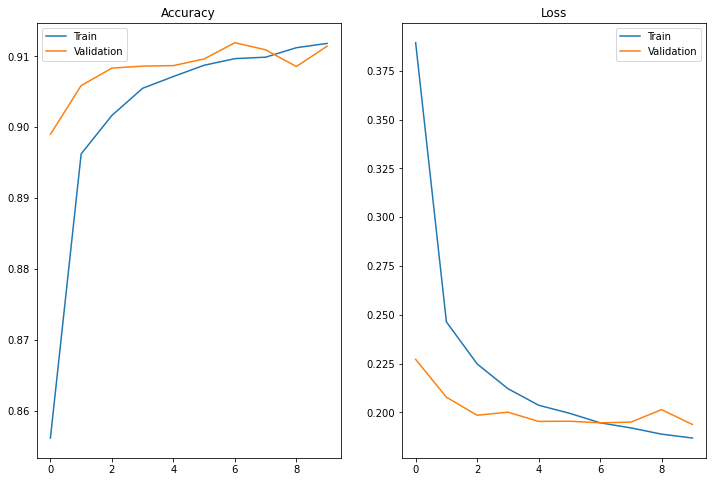

Training Set Performance
              precision    recall  f1-score   support

           A       0.99      1.00      0.99     35922
           B       0.98      0.99      0.98      5574
           C       0.98      0.97      0.98      8694
           D       0.99      0.97      0.98      9864
           E       0.99      0.99      0.99     19193
           F       0.99      0.98      0.99      7361
           G       0.94      0.84      0.88      3487
           H       0.96      0.99      0.97      7825
           I       0.78      0.62      0.69      8887
           J       0.97      0.97      0.97      2739
           K       0.99      0.99      0.99      2764
           L       0.78      0.88      0.83     13882
           M       1.00      0.99      0.99      7705
           N       0.99      0.98      0.98     13761
           0       0.99      0.99      0.99     19185
           P       0.99      0.99      0.99      7070
           Q       0.87      0.91      0.89      2974
  

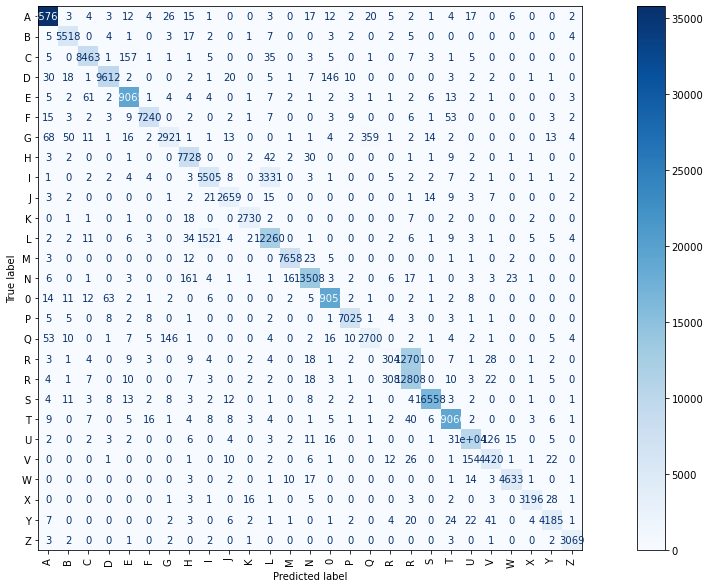

Validation Set Performance
              precision    recall  f1-score   support

           A       0.99      0.99      0.99      8981
           B       0.96      0.98      0.97      1394
           C       0.97      0.96      0.97      2173
           D       0.98      0.96      0.97      2466
           E       0.98      0.99      0.98      4798
           F       0.98      0.97      0.98      1840
           G       0.90      0.82      0.86       872
           H       0.95      0.97      0.96      1956
           I       0.76      0.62      0.69      2222
           J       0.95      0.94      0.95       685
           K       0.98      0.97      0.97       691
           L       0.77      0.87      0.82      3471
           M       0.99      0.99      0.99      1926
           N       0.98      0.97      0.98      3440
           0       0.98      0.99      0.98      4797
           P       0.98      0.99      0.98      1768
           Q       0.84      0.86      0.85       743


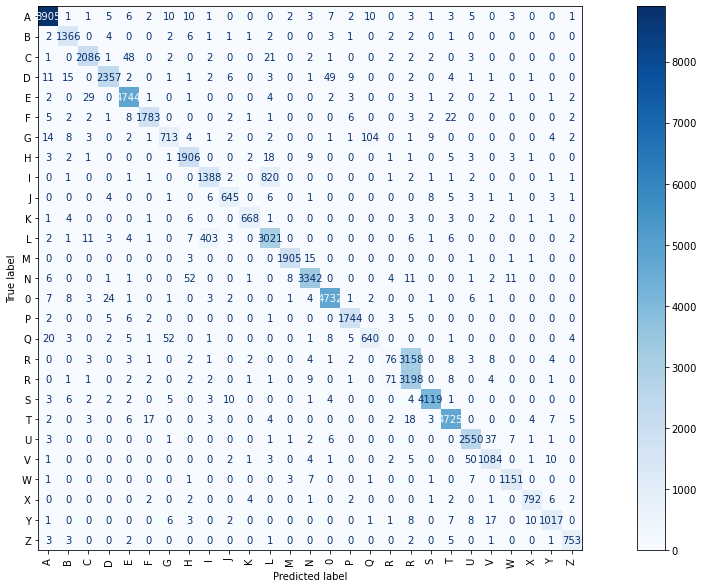

In [12]:
# Plot learning curves
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Loss')
plt.legend()
plt.show()

class_names = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','0','P','Q','R','R','S','T','U','V','W','X','Y','Z']

# Classification Report and Confusion Matrix for Training Set
print('Training Set Performance')
y_train_pred = np.argmax(model.predict(X_train), axis=1)
print(classification_report(t_train, y_train_pred, target_names=class_names))

cm = confusion_matrix(t_train, y_train_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
fig, ax = plt.subplots(figsize=(20, 10))  # Explicitly create a figure and axis
disp.plot(xticks_rotation='vertical', cmap='Blues', ax=ax)
plt.show()

# Classification Report and Confusion Matrix for Validation Set
print('Validation Set Performance')
y_val_pred = np.argmax(model.predict(X_val), axis=1)
print(classification_report(t_val, y_val_pred, target_names=class_names))

cm = confusion_matrix(t_val, y_val_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
fig, ax = plt.subplots(figsize=(20, 10))  # Explicitly create a figure and axis
disp.plot(xticks_rotation='vertical', cmap='Blues', ax=ax)
plt.show()


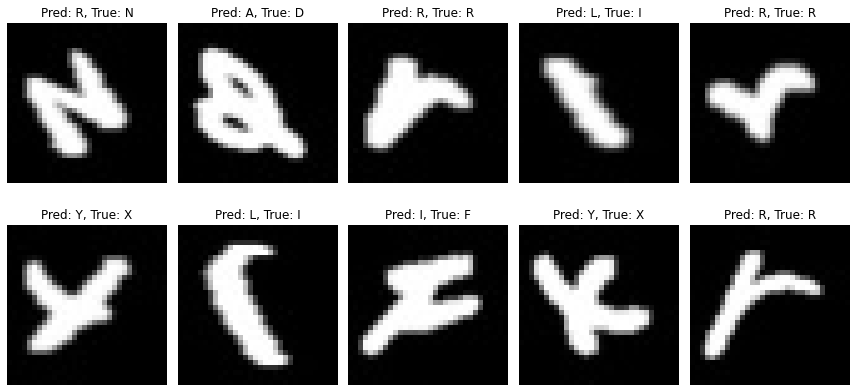

In [24]:
# Predict the entire test set
predictions = model.predict(X_test)
predicted_labels = tf.argmax(predictions, axis=1).numpy()

# True labels are already in integer form
true_labels = t_test 

# Find indices of misclassified samples
misclassified_indices = np.where(predicted_labels != true_labels)[0]

# If there are misclassified samples, display them
if len(misclassified_indices) > 0:
    
    sample_indices = np.random.choice(misclassified_indices, min(10, len(misclassified_indices)), replace=False)

    # Plot the misclassified samples
    plt.figure(figsize=(12, 6))
    for i, idx in enumerate(sample_indices):
        image = X_test[idx].squeeze()  
        pred_label = predicted_labels[idx]
        true_label = true_labels[idx]

        plt.subplot(2, 5, i + 1)
        plt.imshow(image, cmap='gray')
        plt.title(f"Pred: {class_names[pred_label]}, True: {class_names[int(true_label)]}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()



# CNN with Image DataGenerator 

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam


# Normalize the data
X_alp = X_alp / 255.0

# Reshape the data to include the channel dimension (32x32x1 for grayscale images)
X_alp = X_alp.reshape(-1, 32, 32, 1)

# Split the dataset into training and testing sets
X_train, X_test, t_train, t_test = train_test_split(X_alp, t_alp, 
                                                    test_size=0.2, 
                                                    random_state=42)

# Split the Training data into Train and Validation Set
X_train, X_val, t_train, t_val = train_test_split(X_train, 
                                                  t_train, 
                                                  shuffle=True,
                                                  stratify=t_train,
                                                  test_size=0.2)

# Convert labels to one-hot encoding (35 classes: 0-9, A-Z including 'O' as 0)
num_classes = 27
t_train_onehot = tf.keras.utils.to_categorical(t_train, num_classes=num_classes)
t_val_onehot = tf.keras.utils.to_categorical(t_val, num_classes=num_classes)
t_test_onehot = tf.keras.utils.to_categorical(t_test, num_classes=num_classes)

# Create an ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,        # Random rotations
    width_shift_range=0.2,    # Horizontal shift
    height_shift_range=0.2,   # Vertical shift
    shear_range=0.2,          # Random shear
    zoom_range=0.2,           # Random zoom
    horizontal_flip=True,     # Random horizontal flip
    fill_mode='nearest'       # Fill missing pixels with the nearest value
)

# Fit the generator on the training data
datagen.fit(X_train)

# Define the CNN model with adjusted architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),  # Additional dense layer
    Dense(num_classes, activation='softmax')  # 36 classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, t_train_onehot,
                    validation_data=(X_val, t_val_onehot),
                    epochs=30, 
                    batch_size=32)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, t_test_onehot, verbose=2)
print(f"Test accuracy: {test_acc:.2f}")

# Save the model for future use
model.save("alpha_classifier_30000_ImageGernerator.h5")


2024-12-10 02:02:46.432762: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-12-10 02:02:47.181382: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 78902 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-80GB, pci bus id: 0000:47:00.0, compute capability: 8.0


Epoch 1/30


2024-12-10 02:02:49.834306: I tensorflow/stream_executor/cuda/cuda_dnn.cc:366] Loaded cuDNN version 8201
2024-12-10 02:02:51.552680: I tensorflow/stream_executor/cuda/cuda_blas.cc:1774] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


8423/8423 [==============================] - 23s 2ms/step - loss: 0.3895 - accuracy: 0.8560 - val_loss: 0.2321 - val_accuracy: 0.8994
Epoch 2/30
8423/8423 [==============================] - 19s 2ms/step - loss: 0.2492 - accuracy: 0.8955 - val_loss: 0.2060 - val_accuracy: 0.9069
Epoch 3/30
8423/8423 [==============================] - 19s 2ms/step - loss: 0.2265 - accuracy: 0.9020 - val_loss: 0.2038 - val_accuracy: 0.9070
Epoch 4/30
8423/8423 [==============================] - 19s 2ms/step - loss: 0.2155 - accuracy: 0.9047 - val_loss: 0.1991 - val_accuracy: 0.9088
Epoch 5/30
8423/8423 [==============================] - 19s 2ms/step - loss: 0.2071 - accuracy: 0.9070 - val_loss: 0.2021 - val_accuracy: 0.9077
Epoch 6/30
8423/8423 [==============================] - 19s 2ms/step - loss: 0.2019 - accuracy: 0.9080 - val_loss: 0.1948 - val_accuracy: 0.9099
Epoch 7/30
8423/8423 [==============================] - 19s 2ms/step - loss: 0.1972 - accuracy: 0.9086 - val_loss: 0.1954 - val_accuracy: 0.9

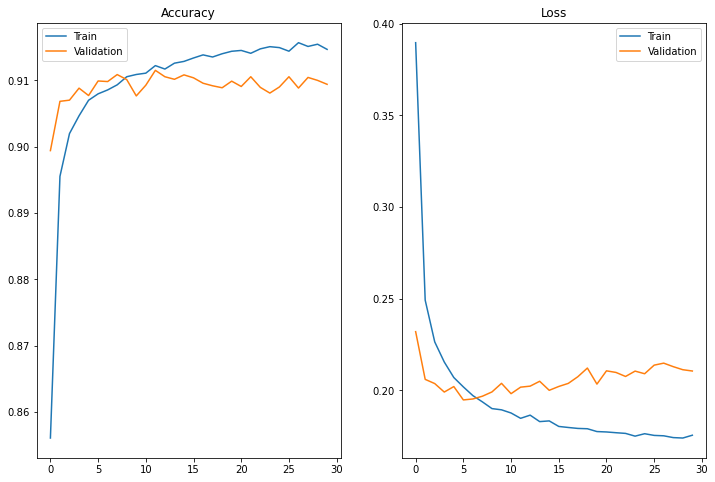

Training Set Performance
              precision    recall  f1-score   support

           A       0.99      1.00      0.99     35922
           B       1.00      0.98      0.99      5574
           C       0.98      0.99      0.98      8694
           D       0.98      0.99      0.98      9864
           E       0.99      0.99      0.99     19193
           F       0.99      0.98      0.99      7361
           G       0.95      0.87      0.91      3487
           H       0.98      0.99      0.99      7825
           I       0.77      0.65      0.71      8887
           J       0.98      0.97      0.98      2739
           K       0.99      0.99      0.99      2764
           L       0.79      0.88      0.83     13882
           M       1.00      0.99      1.00      7705
           N       0.98      0.99      0.99     13761
           0       0.99      0.99      0.99     19185
           P       1.00      0.99      0.99      7070
           Q       0.89      0.92      0.90      2974
  

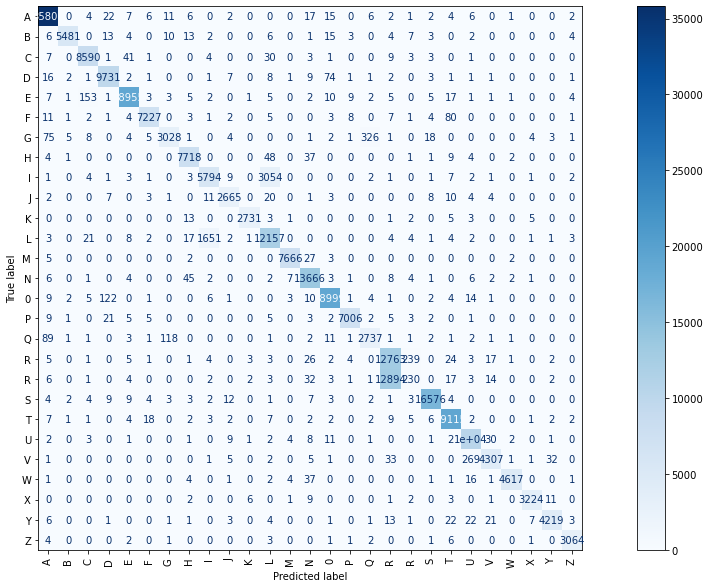

Validation Set Performance
              precision    recall  f1-score   support

           A       0.99      0.99      0.99      8981
           B       0.98      0.96      0.97      1394
           C       0.96      0.97      0.96      2173
           D       0.96      0.97      0.96      2466
           E       0.99      0.98      0.98      4798
           F       0.98      0.97      0.97      1840
           G       0.88      0.78      0.83       872
           H       0.96      0.96      0.96      1956
           I       0.76      0.65      0.70      2222
           J       0.93      0.94      0.94       685
           K       0.98      0.96      0.97       691
           L       0.79      0.86      0.82      3471
           M       0.99      0.99      0.99      1926
           N       0.96      0.98      0.97      3440
           0       0.98      0.98      0.98      4797
           P       0.99      0.98      0.98      1768
           Q       0.83      0.84      0.84       743


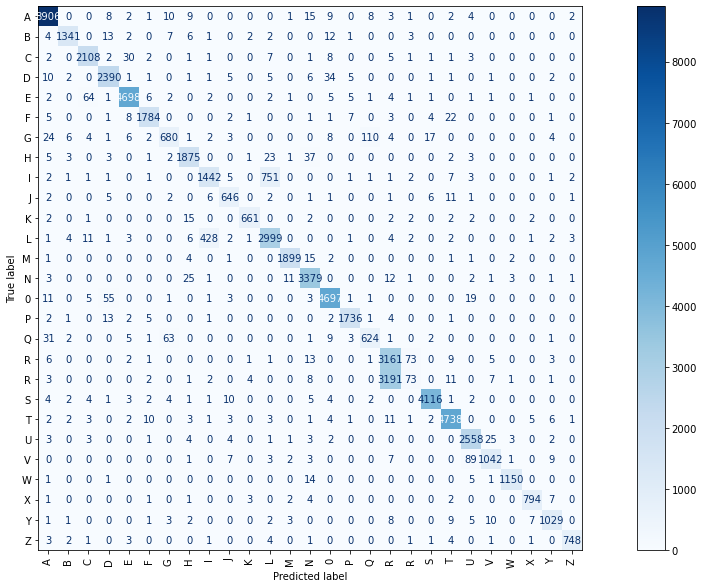

In [4]:
# Plot learning curves
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Loss')
plt.legend()
plt.show()

class_names = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','0','P','Q','R','R','S','T','U','V','W','X','Y','Z']

# Classification Report and Confusion Matrix for Training Set
print('Training Set Performance')
y_train_pred = np.argmax(model.predict(X_train), axis=1)
print(classification_report(t_train, y_train_pred, target_names=class_names))

cm = confusion_matrix(t_train, y_train_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
fig, ax = plt.subplots(figsize=(20, 10))  # Explicitly create a figure and axis
disp.plot(xticks_rotation='vertical', cmap='Blues', ax=ax)
plt.show()

# Classification Report and Confusion Matrix for Validation Set
print('Validation Set Performance')
y_val_pred = np.argmax(model.predict(X_val), axis=1)
print(classification_report(t_val, y_val_pred, target_names=class_names))

cm = confusion_matrix(t_val, y_val_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
fig, ax = plt.subplots(figsize=(20, 10))  # Explicitly create a figure and axis
disp.plot(xticks_rotation='vertical', cmap='Blues', ax=ax)
plt.show()


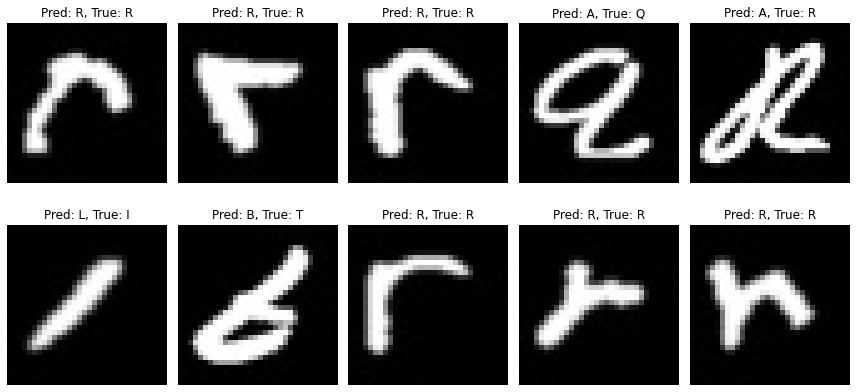

In [5]:
# Predict the entire test set
predictions = model.predict(X_test)
predicted_labels = tf.argmax(predictions, axis=1).numpy()

# True labels are already in integer form
true_labels = t_test 

# Find indices of misclassified samples
misclassified_indices = np.where(predicted_labels != true_labels)[0]

# If there are misclassified samples, display them
if len(misclassified_indices) > 0:
    
    sample_indices = np.random.choice(misclassified_indices, min(10, len(misclassified_indices)), replace=False)

    # Plot the misclassified samples
    plt.figure(figsize=(12, 6))
    for i, idx in enumerate(sample_indices):
        image = X_test[idx].squeeze()  
        pred_label = predicted_labels[idx]
        true_label = true_labels[idx]

        plt.subplot(2, 5, i + 1)
        plt.imshow(image, cmap='gray')
        plt.title(f"Pred: {class_names[pred_label]}, True: {class_names[int(true_label)]}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()



# CNN using ResNet50

In [2]:
class_names = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','0','P','Q','R','R','S','T','U','V','W','X','Y','Z']

In [3]:
# Load the Alphabet Dataset
X_alp = np.load('X_20000_alphabet.npy')
t_alp = np.load('t_20000_alphabet.npy')

In [4]:
from tensorflow import keras
from tensorflow.keras.applications import ResNet50
import tensorflow as tf
from sklearn.model_selection import train_test_split
import numpy as np

# Load the Alphabet Dataset
X_alp = np.load('X_10000_alphabet.npy')
t_alp = np.load('t_10000_alphabet.npy')

# Normalize the data
X_alp = X_alp / 255.0
t_alp = t_alp 

# Reshape the data to include the channel dimension (32x32x1 for grayscale images)
X_alp = X_alp.reshape(-1, 32, 32, 1)

# Split the dataset into training and testing sets
X_train, X_test, t_train, t_test = train_test_split(X_alp, t_alp, 
                                                    test_size=0.2, 
                                                    random_state=42)

# Split the Training data into Training and Validation Sets
X_train, X_val, t_train, t_val = train_test_split(X_train, 
                                                  t_train, 
                                                  shuffle=True,
                                                  stratify=t_train,
                                                  test_size=0.2)

# Convert grayscale images to RGB
def convert_grayscale_to_rgb(dataset):
    return tf.image.grayscale_to_rgb(dataset)

X_train_rgb = convert_grayscale_to_rgb(tf.constant(X_train, dtype=tf.float32))
X_val_rgb = convert_grayscale_to_rgb(tf.constant(X_val, dtype=tf.float32))

2024-12-10 13:03:28.961411: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-12-10 13:03:32.005702: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 78902 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-80GB, pci bus id: 0000:87:00.0, compute capability: 8.0


In [7]:


# Data augmentation
data_augmentation = keras.Sequential([
    keras.layers.RandomFlip("horizontal"),
    keras.layers.RandomRotation(0.2),
    keras.layers.RandomZoom(0.2),
])

# Pre-trained ResNet50 model
base_model = ResNet50(
    weights='imagenet',
    input_shape=(32, 32, 3),  
    include_top=False
)
base_model.trainable = False

# Model building
IMG_SIZE = 32
inputs = keras.Input(shape=(32, 32, 3))
x = data_augmentation(inputs)
x = keras.layers.Resizing(IMG_SIZE, IMG_SIZE)(x)
x = base_model(x, training=False)
x = keras.layers.Flatten()(x)
x = keras.layers.Dropout(0.3)(x)
outputs = keras.layers.Dense(len(class_names), activation='softmax')(x)
#outputs = keras.layers.Dense(len(np.unique(t_alp)), activation='relu')(x)
model = keras.Model(inputs, outputs)

# Compile the model for classification
model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-3),
              loss='sparse_categorical_crossentropy',  # For multi-class classification with integer labels
              metrics=['accuracy'])

# Training with callbacks
history = model.fit(X_train_rgb, t_train,
                    validation_data=(X_val_rgb, t_val),
                    epochs=50,
                    batch_size=32,
                    callbacks=[
                        keras.callbacks.EarlyStopping(patience=10, 
                                                      restore_best_weights=True),
                        keras.callbacks.ReduceLROnPlateau(factor=0.5, 
                                                          patience=5)
                    ])

# Fine-tuning
base_model.trainable = True
model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-5),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history_ft = model.fit(X_train_rgb, t_train,
                       validation_data=(X_val_rgb, t_val),
                       epochs=20,
                       batch_size=32,
                       callbacks=[
                           keras.callbacks.EarlyStopping(patience=5, 
                                                         restore_best_weights=True)
                       ])


Epoch 1/50
5400/5400 [==============================] - 38s 7ms/step - loss: 2.4171 - accuracy: 0.3050 - val_loss: 2.0438 - val_accuracy: 0.4095 - lr: 0.0010
Epoch 2/50
5400/5400 [==============================] - 36s 7ms/step - loss: 2.2773 - accuracy: 0.3381 - val_loss: 2.0427 - val_accuracy: 0.4037 - lr: 0.0010
Epoch 3/50
5400/5400 [==============================] - 40s 7ms/step - loss: 2.2619 - accuracy: 0.3418 - val_loss: 1.9606 - val_accuracy: 0.4371 - lr: 0.0010
Epoch 4/50
5400/5400 [==============================] - 40s 7ms/step - loss: 2.2473 - accuracy: 0.3454 - val_loss: 1.9629 - val_accuracy: 0.4388 - lr: 0.0010
Epoch 5/50
5400/5400 [==============================] - 40s 7ms/step - loss: 2.2446 - accuracy: 0.3475 - val_loss: 1.9658 - val_accuracy: 0.4400 - lr: 0.0010
Epoch 6/50
5400/5400 [==============================] - 40s 7ms/step - loss: 2.2402 - accuracy: 0.3484 - val_loss: 1.9727 - val_accuracy: 0.4377 - lr: 0.0010
Epoch 7/50
5400/5400 [==============================

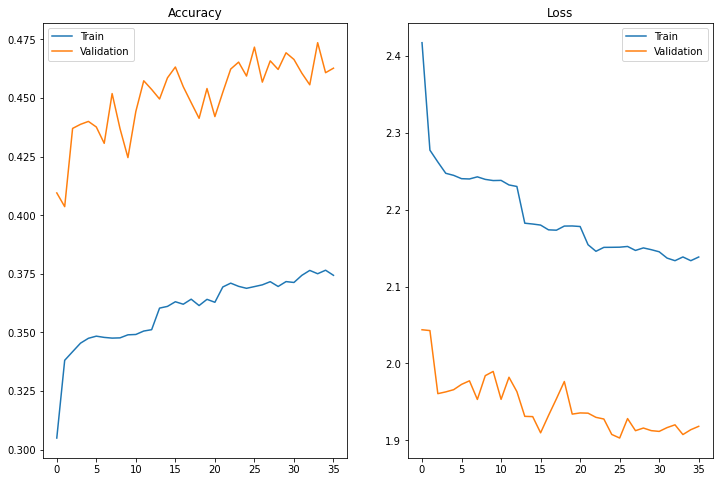

Training Set Performance
              precision    recall  f1-score   support

           A       0.98      0.99      0.99     32776
           B       0.95      0.96      0.96      5538
           C       0.98      0.93      0.95      6416
           D       0.92      0.97      0.95      6378
           E       0.95      0.96      0.95      6402
           F       0.96      0.96      0.96      6396
           G       0.75      0.85      0.80      3495
           H       0.96      0.94      0.95      6363
           I       0.84      0.54      0.66      6398
           J       0.86      0.94      0.90      2790
           K       0.96      0.97      0.96      2789
           L       0.65      0.87      0.74      6386
           M       0.98      0.98      0.98      6394
           N       0.93      0.95      0.94      6391
           0       0.98      0.96      0.97      6377
           P       0.97      0.96      0.96      6404
           Q       0.80      0.76      0.78      3014
  

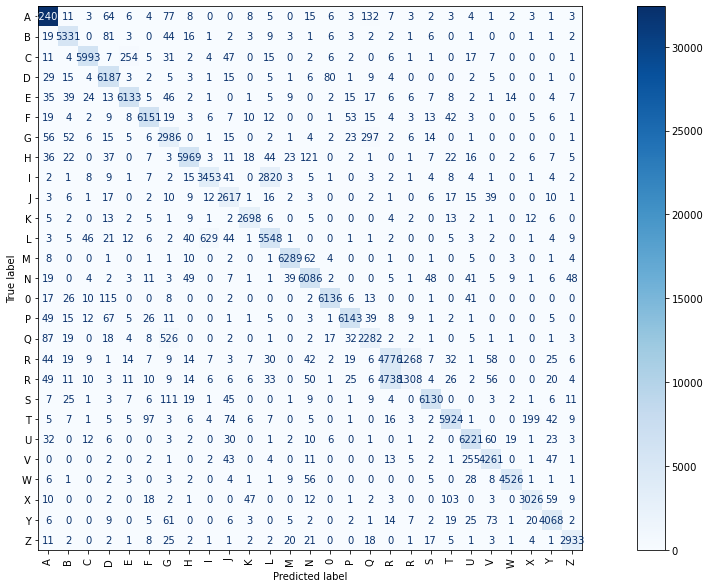

Validation Set Performance
              precision    recall  f1-score   support

           A       0.98      0.99      0.98      8194
           B       0.94      0.96      0.95      1384
           C       0.97      0.94      0.96      1604
           D       0.92      0.97      0.94      1595
           E       0.95      0.96      0.95      1601
           F       0.95      0.96      0.96      1599
           G       0.74      0.85      0.79       874
           H       0.95      0.93      0.94      1591
           I       0.84      0.53      0.65      1599
           J       0.85      0.94      0.89       697
           K       0.95      0.96      0.95       697
           L       0.64      0.87      0.74      1597
           M       0.98      0.99      0.99      1599
           N       0.93      0.95      0.94      1598
           0       0.97      0.96      0.96      1594
           P       0.98      0.97      0.97      1601
           Q       0.79      0.75      0.77       753


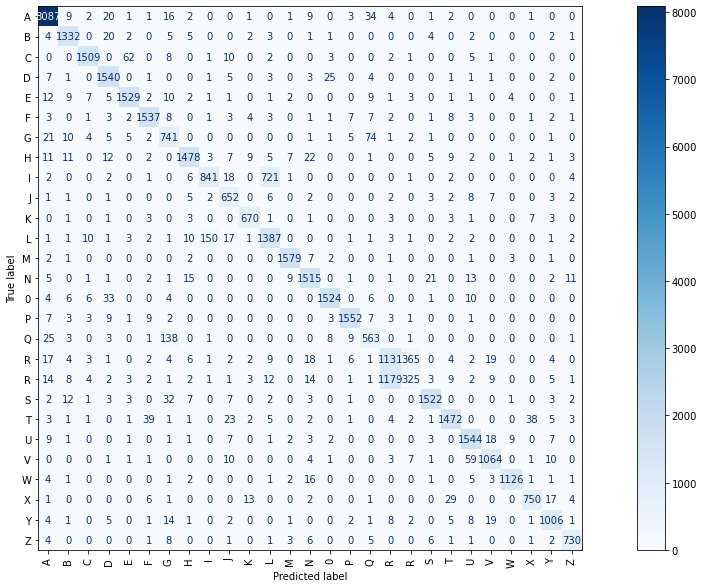

In [10]:
# Plot learning curves
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Loss')
plt.legend()
plt.show()

class_names = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','0','P','Q','R','R','S','T','U','V','W','X','Y','Z']

# Classification Report and Confusion Matrix for Training Set
print('Training Set Performance')
y_train_pred = np.argmax(model.predict(X_train_rgb), axis=1)
print(classification_report(t_train, y_train_pred, target_names=class_names))

cm = confusion_matrix(t_train, y_train_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
fig, ax = plt.subplots(figsize=(20, 10))  
disp.plot(xticks_rotation='vertical', cmap='Blues', ax=ax)
plt.show()

# Classification Report and Confusion Matrix for Validation Set
print('Validation Set Performance')
y_val_pred = np.argmax(model.predict(X_val_rgb), axis=1)
print(classification_report(t_val, y_val_pred, target_names=class_names))

cm = confusion_matrix(t_val, y_val_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
fig, ax = plt.subplots(figsize=(20, 10)) 
disp.plot(xticks_rotation='vertical', cmap='Blues', ax=ax)
plt.show()


In [ ]:
# Save the model for future use
model.save("alpha_classifier_20000_ResNet50.h5")

# Using CNN ResNet50 for Alpabet + Numeric 

In [2]:
class_names = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','P','Q','R','S','T','U','V','W','X','Y','Z','0','1', '2', '3', '4', '5', '6', '7', '8', '9']
print(len(class_names))

35


In [3]:
# Load the Alphabet Dataset
X_alp = np.load('X_15000_mixed.npy')
t_alp = np.load('t_15000_mixed.npy')

In [4]:
from tensorflow import keras
from tensorflow.keras.applications import ResNet50
import tensorflow as tf
from sklearn.model_selection import train_test_split
import numpy as np

# Normalize the data
X_alp = X_alp / 255.0
t_alp = t_alp 

# Reshape the data to include the channel dimension (32x32x1 for grayscale images)
X_alp = X_alp.reshape(-1, 32, 32, 1)

# Split the dataset into training and testing sets
X_train, X_test, t_train, t_test = train_test_split(X_alp, t_alp, 
                                                    test_size=0.2, 
                                                    random_state=42)

# Split the Training data into Training and Validation Sets
X_train, X_val, t_train, t_val = train_test_split(X_train, 
                                                  t_train, 
                                                  shuffle=True,
                                                  stratify=t_train,
                                                  test_size=0.2)

# Convert grayscale images to RGB
def convert_grayscale_to_rgb(dataset):
    return tf.image.grayscale_to_rgb(dataset)

X_train_rgb = convert_grayscale_to_rgb(tf.constant(X_train, dtype=tf.float32))
X_val_rgb = convert_grayscale_to_rgb(tf.constant(X_val, dtype=tf.float32))

2024-12-10 18:59:03.006769: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-12-10 18:59:03.672009: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 78902 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-80GB, pci bus id: 0000:87:00.0, compute capability: 8.0


In [ ]:


# Data augmentation
data_augmentation = keras.Sequential([
    keras.layers.RandomFlip("horizontal"),
    keras.layers.RandomRotation(0.2),
    keras.layers.RandomZoom(0.2),
])

# Pre-trained ResNet50 model
base_model = ResNet50(
    weights='imagenet',
    input_shape=(32, 32, 3),  
    include_top=False
)
base_model.trainable = False

# Model building
IMG_SIZE = 32
inputs = keras.Input(shape=(32, 32, 3))
x = data_augmentation(inputs)
x = keras.layers.Resizing(IMG_SIZE, IMG_SIZE)(x)
x = base_model(x, training=False)
x = keras.layers.Flatten()(x)
x = keras.layers.Dropout(0.3)(x)
outputs = keras.layers.Dense(len(class_names), activation='softmax')(x)
#outputs = keras.layers.Dense(len(np.unique(t_alp)), activation='relu')(x)
model = keras.Model(inputs, outputs)

# Compile the model for classification
model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-3),
              loss='sparse_categorical_crossentropy',  # For multi-class classification with integer labels
              metrics=['accuracy'])

# Training with callbacks
history = model.fit(X_train_rgb, t_train,
                    validation_data=(X_val_rgb, t_val),
                    epochs=50,
                    batch_size=8,
                    callbacks=[
                        keras.callbacks.EarlyStopping(patience=10, 
                                                      restore_best_weights=True),
                        keras.callbacks.ReduceLROnPlateau(factor=0.5, 
                                                          patience=5)
                    ])

# Fine-tuning
base_model.trainable = True
model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-5),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history_ft = model.fit(X_train_rgb, t_train,
                       validation_data=(X_val_rgb, t_val),
                       epochs=20,
                       batch_size=8,
                       callbacks=[
                           keras.callbacks.EarlyStopping(patience=5, 
                                                         restore_best_weights=True)
                       ])


Epoch 1/50


In [7]:
# Save the model for future use
model.save("mixed_classifier_15000_ResNet50.h5")

/apps/tensorflow/2.7.0/lib/python3.9/site-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


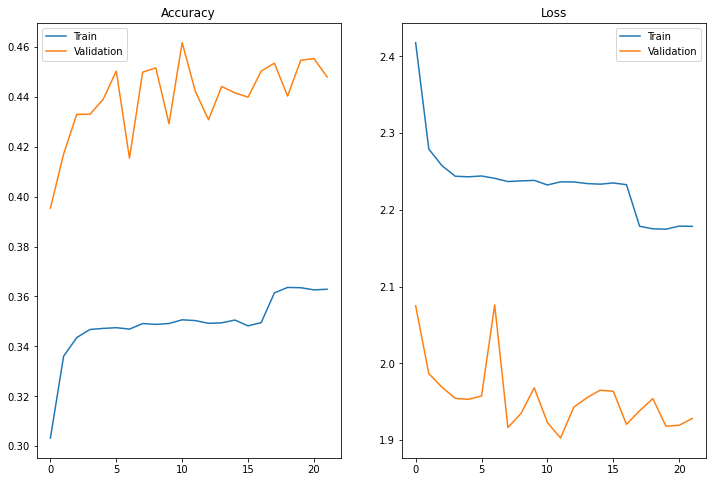

Training Set Performance


ValueError: Number of classes, 27, does not match size of target_names, 36. Try specifying the labels parameter

In [8]:
# Plot learning curves
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Loss')
plt.legend()
plt.show()

class_names = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','P','Q','R','R','S','T','U','V','W','X','Y','Z','0','1', '2', '3', '4', '5', '6', '7', '8', '9']

# Classification Report and Confusion Matrix for Training Set
print('Training Set Performance')
y_train_pred = np.argmax(model.predict(X_train_rgb), axis=1)
print(classification_report(t_train, y_train_pred, target_names=class_names))

cm = confusion_matrix(t_train, y_train_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
fig, ax = plt.subplots(figsize=(20, 10))  
disp.plot(xticks_rotation='vertical', cmap='Blues', ax=ax)
plt.show()

# Classification Report and Confusion Matrix for Validation Set
print('Validation Set Performance')
y_val_pred = np.argmax(model.predict(X_val_rgb), axis=1)
print(classification_report(t_val, y_val_pred, target_names=class_names))

cm = confusion_matrix(t_val, y_val_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
fig, ax = plt.subplots(figsize=(20, 10))  
disp.plot(xticks_rotation='vertical', cmap='Blues', ax=ax)
plt.show()
